# Credit Risk Problem Statement

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
default_df = pd.read_excel('D:/DataSets/CompData-1.xlsx')
default_df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [3]:
default_df.tail()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
2053,2743,Kothari Ferment.,3.021580e-04,6.490000e+09,0.477066,0.000000,0.183014,0.322063,0.192739,0.022127,...,0.320387,0.004430,0,0.000420,0.624567,0.026791,0.565158,1,0.171662,0
2054,21216,Firstobj.Tech.,1.371450e-04,0.000000e+00,0.465211,0.000658,0.000000,0.319764,0.169391,0.022072,...,0.312324,0.032284,0,0.000882,0.624008,0.024201,0.573670,1,0.053740,0
2055,142,Diamines & Chem.,2.114990e-04,8.370000e+09,0.480248,0.000502,0.000000,0.327828,0.155005,0.021861,...,0.313122,0.040998,0,0.009579,0.623718,0.026702,0.564697,1,0.054984,0
2056,18014,IL&FS Engg.,3.750000e+09,0.000000e+00,0.474670,0.000578,0.306205,0.322027,0.173834,0.022167,...,0.315632,0.020275,0,0.004958,0.623443,0.026943,0.565792,1,0.057553,0
2057,43229,Channel Nine,2.981110e-04,0.000000e+00,0.467203,0.000826,0.000000,0.330021,0.180236,0.022418,...,0.316734,0.031368,0,0.000186,0.623588,0.026871,0.565512,1,0.020266,0


In [4]:
print('The number of rows (observations) is',default_df.shape[0],'\n''The number of columns (variables) is',default_df.shape[1])

The number of rows (observations) is 2058 
The number of columns (variables) is 58


In [5]:
default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [6]:
default_df.duplicated().sum()

0

<b> Dropping the irrelevant columns

In [7]:
default_df.drop(['Co_Code','Co_Name'], axis = 1, inplace = True)

#### Checking the basic measures of descriptive statistics for the continuous variables.

In [8]:
default_df.shape

(2058, 56)

In [9]:
default_df.describe().T

,count,mean,std,min,25%,50%,75%,max
_Operating_Expense_Rate,2058.0,2.052389e+09,3.252624e+09,0.000100,1.578727e-04,3.330330e-04,4.110000e+09,9.980000e+09
_Research_and_development_expense_rate,2058.0,1.208634e+09,2.144568e+09,0.000000,0.000000e+00,1.994130e-04,1.550000e+09,9.980000e+09
_Cash_flow_rate,2058.0,4.652426e-01,2.266269e-02,0.000000,4.600991e-01,4.634450e-01,4.680691e-01,1.000000e+00
_Interest_bearing_debt_interest_rate,2058.0,1.113022e+07,9.042595e+07,0.000000,2.760280e-04,4.540450e-04,6.630660e-04,9.900000e+08
_Tax_rate_A,2058.0,1.147770e-01,1.524457e-01,0.000000,0.000000e+00,3.709890e-02,2.161909e-01,9.996963e-01
_Cash_Flow_Per_Share,1891.0,3.199856e-01,1.529979e-02,0.169449,3.149890e-01,3.206479e-01,3.259178e-01,4.622268e-01
_Per_Share_Net_profit_before_tax_Yuan_,2058.0,1.769673e-01,3.015730e-02,0.000000,1.666039e-01,1.756421e-01,1.858854e-01,7.923477e-01
_Realized_Sales_Gross_Profit_Growth_Rate,2058.0,2.276117e-02,2.170104e-02,0.004282,2.205831e-02,2.210001e-02,2.215200e-02,1.000000e+00
_Operating_Profit_Growth_Rate,2058.0,8.481083e-01,4.589093e-03,0.736430,8.479740e-01,8.480386e-01,8.481147e-01,1.000000e+00
_Continuous_Net_Profit_Growth_Rate,2058.0,2.173915e-01,5.678779e-03,0.000000,2.175741e-01,2.175961e-01,2.176198e-01,2.332046e-01


In [10]:
default_df["_Net_Income_Flag"].value_counts()

1    2058
Name: _Net_Income_Flag, dtype: int64

In [11]:
default_df["_Liability_Assets_Flag"].value_counts()

0    2051
1       7
Name: _Liability_Assets_Flag, dtype: int64

<b> The <i> _Net_Income_Flag <i> column only has "1" as its level hence this can be dropped. <br>
<b> The <i> _Liability_Assets_Flag <i> column only has 2 categorical levels namely 1 and 2 hence this needs to be changed to a categorical variable.

In [12]:
default_df.drop("_Net_Income_Flag",axis=1,inplace=True)
default_df["_Liability_Assets_Flag"] = default_df["_Liability_Assets_Flag"].astype('object')
default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 55 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   _Operating_Expense_Rate                            2058 non-null   float64
 1   _Research_and_development_expense_rate             2058 non-null   float64
 2   _Cash_flow_rate                                    2058 non-null   float64
 3   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 4   _Tax_rate_A                                        2058 non-null   float64
 5   _Cash_Flow_Per_Share                               1891 non-null   float64
 6   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 7   _Realized_Sales_Gross_Profit_Growth_Rate           2058 non-null   float64
 8   _Operating_Profit_Growth_Rate                      2058 non-null   float64
 9   _Continu

<b> Checking the top value counts in order to determine any other categorical columns in the dataset

In [13]:
for i in default_df.columns:
    print("Length of value counts of {}: {}".format(i,len(default_df[i].value_counts(ascending=False))))

Length of value counts of _Operating_Expense_Rate: 1495
Length of value counts of _Research_and_development_expense_rate: 629
Length of value counts of _Cash_flow_rate: 1888
Length of value counts of _Interest_bearing_debt_interest_rate: 813
Length of value counts of _Tax_rate_A: 985
Length of value counts of _Cash_Flow_Per_Share: 900
Length of value counts of _Per_Share_Net_profit_before_tax_Yuan_: 876
Length of value counts of _Realized_Sales_Gross_Profit_Growth_Rate: 1939
Length of value counts of _Operating_Profit_Growth_Rate: 2015
Length of value counts of _Continuous_Net_Profit_Growth_Rate: 2014
Length of value counts of _Total_Asset_Growth_Rate: 922
Length of value counts of _Net_Value_Growth_Rate: 1757
Length of value counts of _Total_Asset_Return_Growth_Rate_Ratio: 1428
Length of value counts of _Cash_Reinvestment_perc: 1690
Length of value counts of _Current_Ratio: 1972
Length of value counts of _Quick_Ratio: 1970
Length of value counts of _Interest_Expense_Ratio: 1716
Length

#### Checking the count and proportion of the default variable

In [14]:
default_df["Default"].value_counts()

0    1838
1     220
Name: Default, dtype: int64

In [15]:
default_df["Default"].value_counts(normalize=True)

0    0.8931
1    0.1069
Name: Default, dtype: float64

<b> Only 10% of the companies have defaulted which means that techniques like SMOTE and redefining the optimum threshold frequency need to be used to correct the class imbalance and optimize the model performance.

# Outlier Treatment

In [16]:
num_cols = default_df.select_dtypes(include="float").columns
num_cols

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
       '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Quick_Assets_to

<b> Visualizing outliers using boxplots

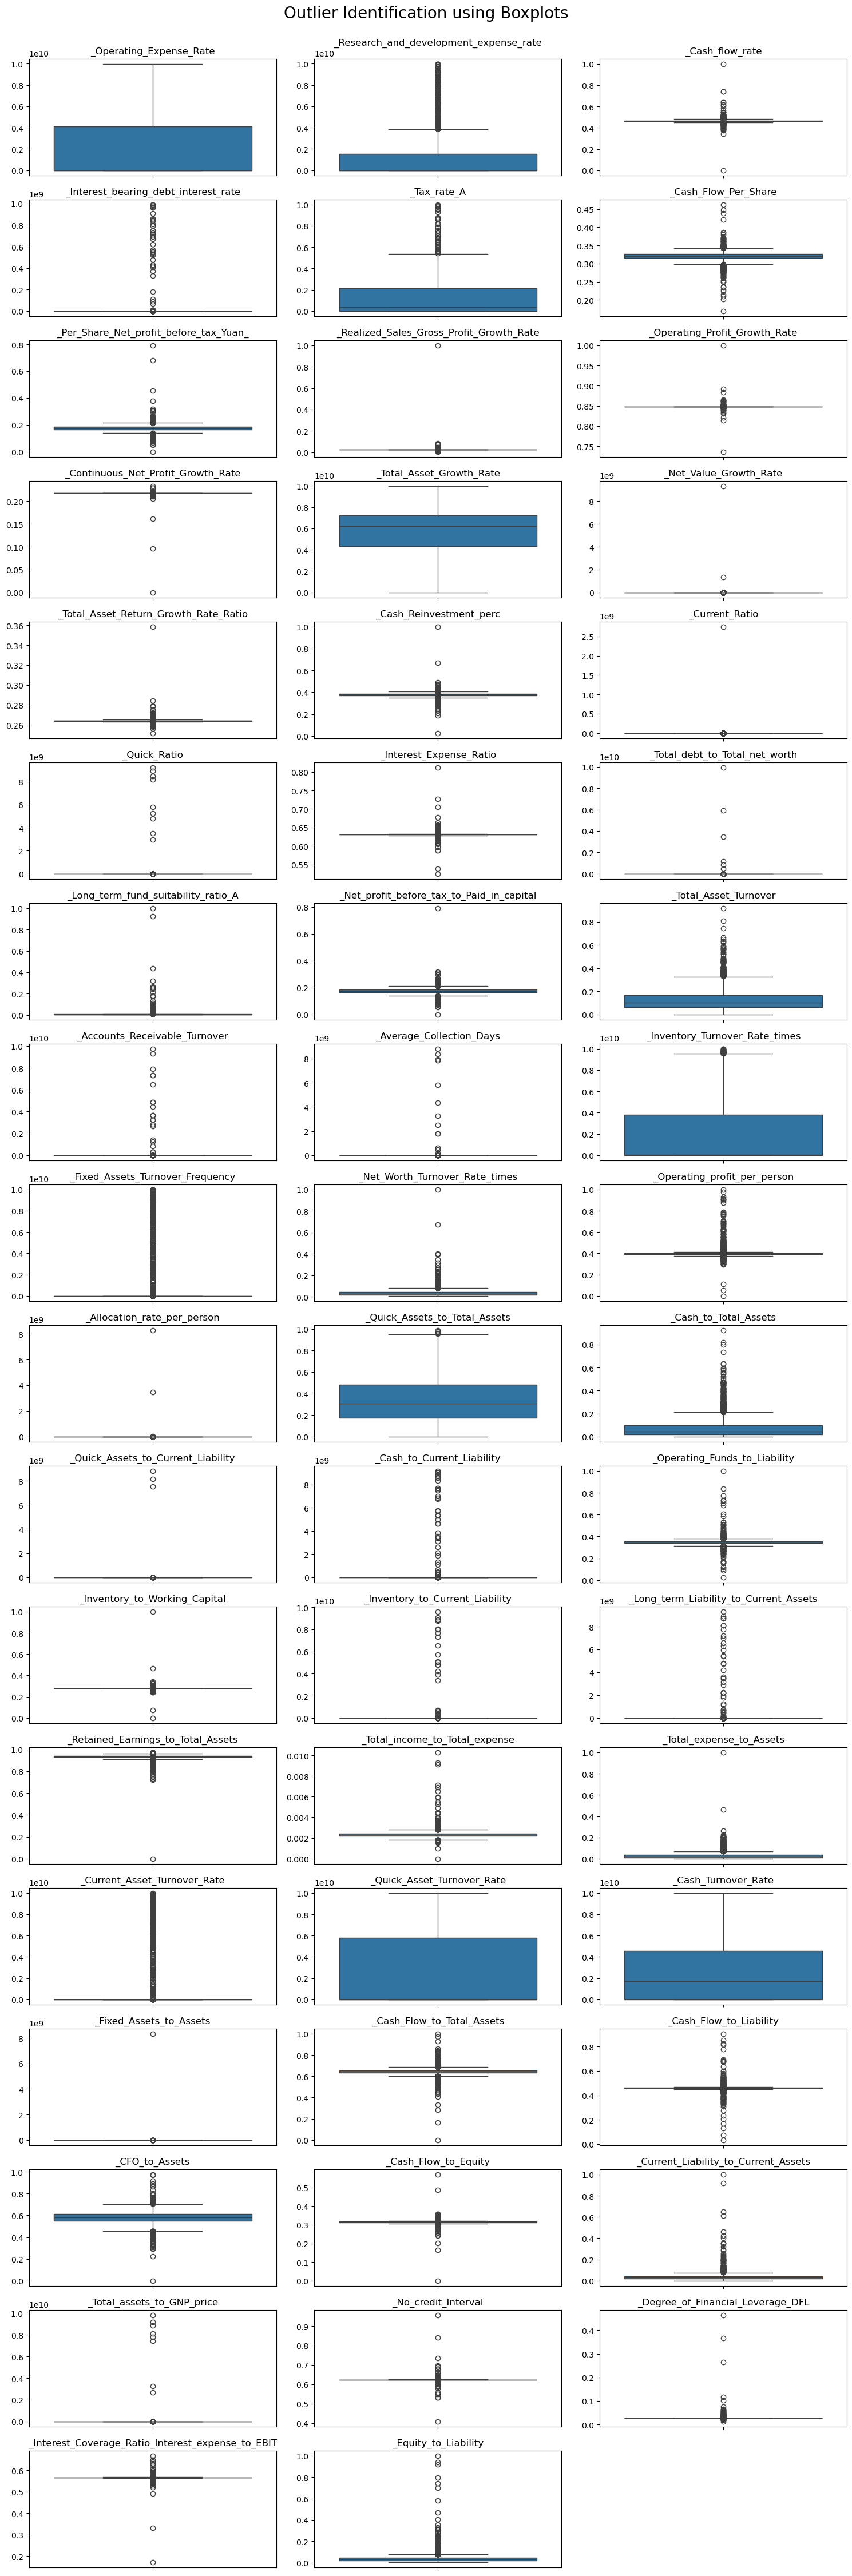

In [17]:
def BoxPlot():
    col = len(num_cols)
    plt.figure(figsize=(15,45))
    plt.suptitle("Outlier Identification using Boxplots",y=1,size=20)
    for i in range(0,col):
        plt.subplot(18,3,i+1)
        plt.title("{}".format(num_cols[i]))
        sns.boxplot(data=default_df,y = num_cols[i])
        plt.tight_layout()
        plt.ylabel("")

BoxPlot()

<b> Many Outliers can be observed and these need to be treated

In [18]:
default_num = default_df.drop(['Default','_Liability_Assets_Flag'], axis = 1)
default_cat = default_df[['Default','_Liability_Assets_Flag']]

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    
    return lower_range, upper_range

In [20]:
for column in default_num.columns:
    lr,ur = remove_outlier(default_df[column])
    
    default_num[column] = np.where(default_num[column] > ur,ur,default_num[column])
    default_num[column] = np.where(default_num[column] < lr,lr,default_num[column])

In [21]:
default_df = pd.concat([default_num, default_cat], axis = 1)

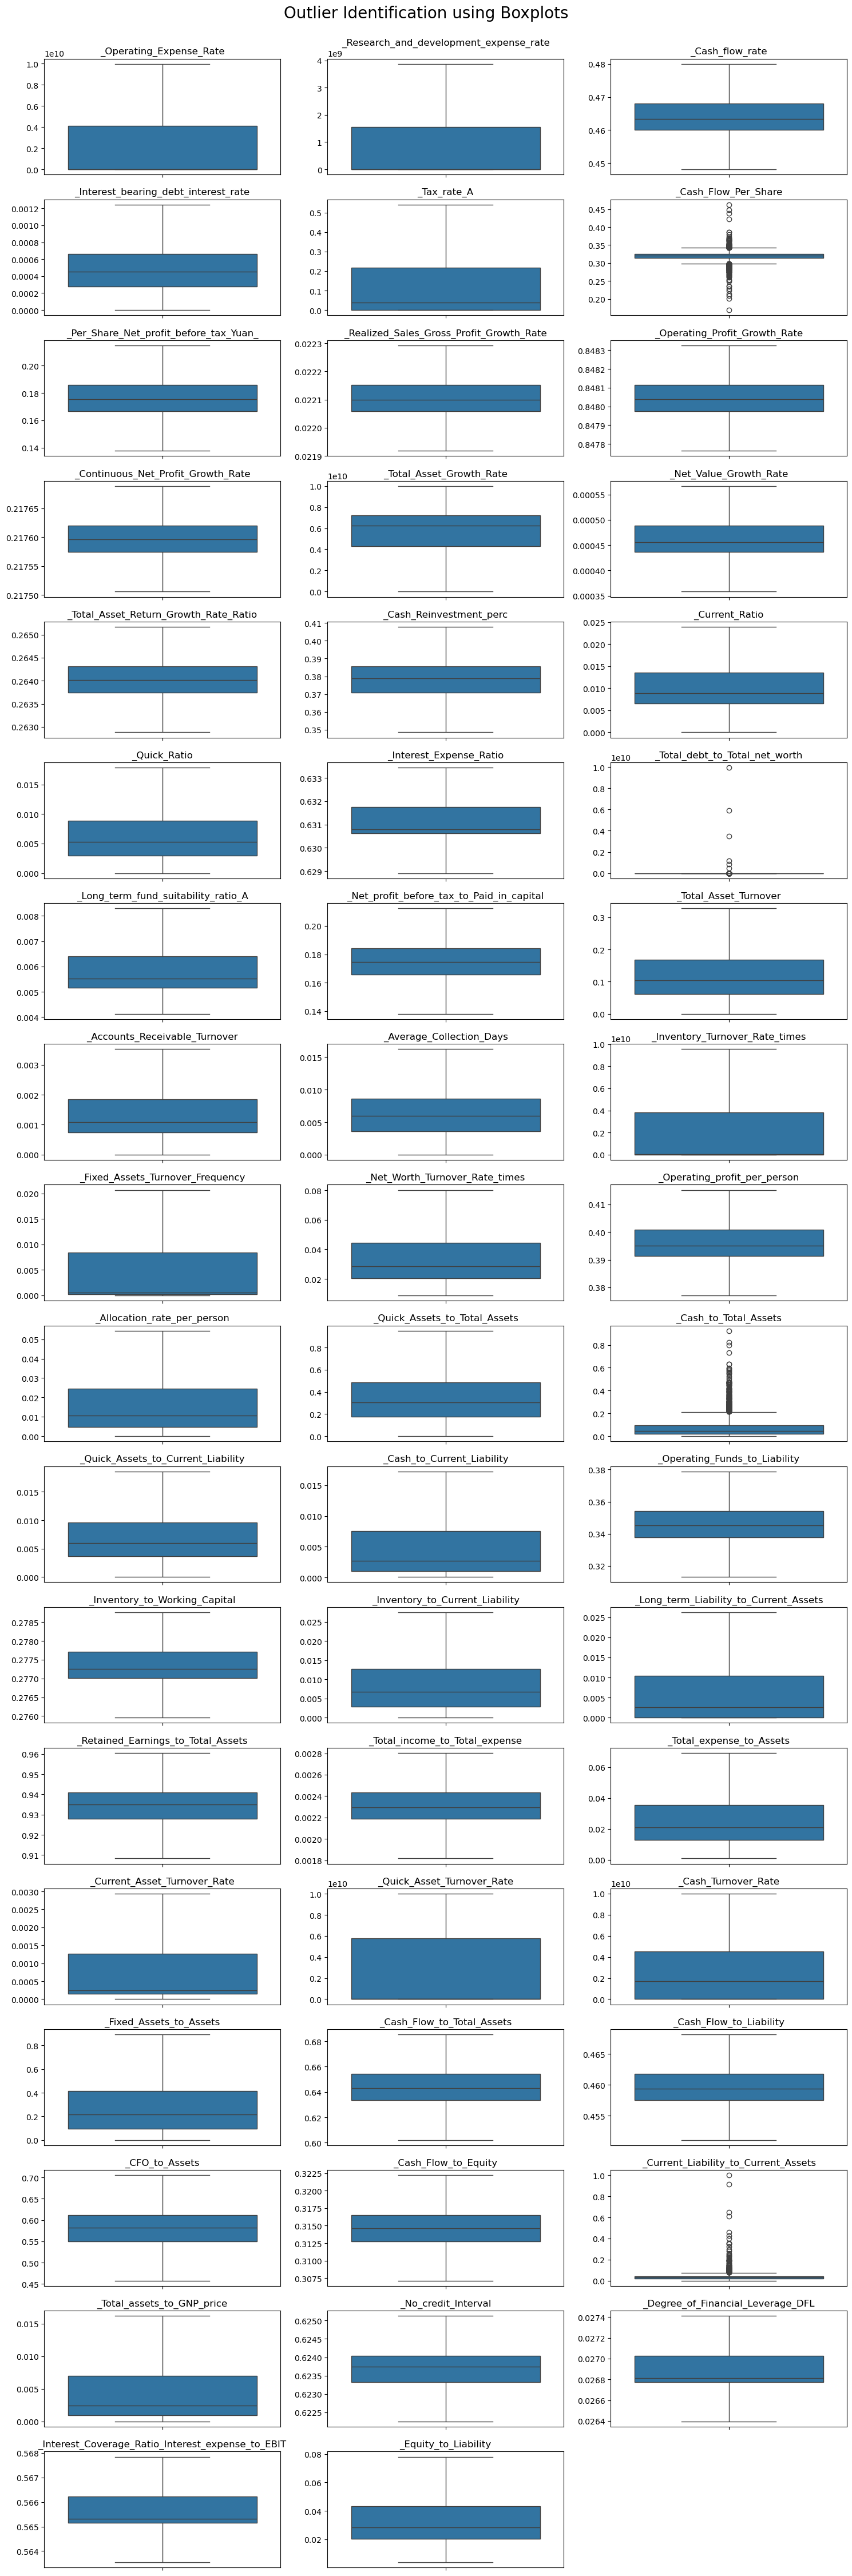

In [22]:
def BoxPlot():
    col = len(num_cols)
    plt.figure(figsize=(15,45))
    plt.suptitle("Outlier Identification using Boxplots",y=1,size=20)
    for i in range(0,col):
        plt.subplot(18,3,i+1)
        plt.title("{}".format(num_cols[i]))
        sns.boxplot(data=default_df,y = num_cols[i])
        plt.tight_layout()
        plt.ylabel("")

BoxPlot()

<b> The outliers have been successfully treated.

# Missing values Treatment

In [23]:
default_df.isnull().sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                                           0
_Interest_Expense_Ratio                                0
_Total_debt_to_Total_net_worth 

<b> Missing values exist in the following columns: </b>
- '_Current_Liability_to_Current_Assets'
- '_Cash_to_Total_Assets'
- '_Total_debt_to_Total_net_worth'
- '_Cash_Flow_Per_Share'

In [24]:
default_df.isnull().sum().sum()

298

In [25]:
len(default_df)

2058

In [26]:
round(298/2058,3)

0.145

<b> A total of 298 null values are present which is roughly 14% of the dataset. Checking if these null values correspond to any defaulters in the dataset.

In [27]:
null_columns = default_df.columns[default_df.isnull().sum() > 0]
result_df = default_df[null_columns]

for i in null_columns:
    defaulters = default_df[default_df[i].isnull()]["Default"].sum()
    null_values = default_df[i].isnull().sum()
    print("Null Values for {}: {}\nTotal defaulters for these null values: {}\n".format(i,null_values,defaulters))

Null Values for _Cash_Flow_Per_Share: 167
Total defaulters for these null values: 12

Null Values for _Total_debt_to_Total_net_worth: 21
Total defaulters for these null values: 3

Null Values for _Cash_to_Total_Assets: 96
Total defaulters for these null values: 14

Null Values for _Current_Liability_to_Current_Assets: 14
Total defaulters for these null values: 1



In [28]:
default_df.Default.value_counts()

0    1838
1     220
Name: Default, dtype: int64

In [29]:
round(30/220,3)

0.136

<b> A total of 30 null observations are present in the dataset for companies that have defaulted. This accounts for 13% of the total defaulters present in the dataset hence dropping these rows would mean that we'll lose important data for the default companies. Hence it would be wise to go ahead and impute these null values with the mean observations.

In [30]:
for i in null_columns:
    default_df[i] = np.where(default_df[i].isnull(),default_df[i].mean(),default_df[i])

In [31]:
default_df.isnull().sum()

_Operating_Expense_Rate                              0
_Research_and_development_expense_rate               0
_Cash_flow_rate                                      0
_Interest_bearing_debt_interest_rate                 0
_Tax_rate_A                                          0
_Cash_Flow_Per_Share                                 0
_Per_Share_Net_profit_before_tax_Yuan_               0
_Realized_Sales_Gross_Profit_Growth_Rate             0
_Operating_Profit_Growth_Rate                        0
_Continuous_Net_Profit_Growth_Rate                   0
_Total_Asset_Growth_Rate                             0
_Net_Value_Growth_Rate                               0
_Total_Asset_Return_Growth_Rate_Ratio                0
_Cash_Reinvestment_perc                              0
_Current_Ratio                                       0
_Quick_Ratio                                         0
_Interest_Expense_Ratio                              0
_Total_debt_to_Total_net_worth                       0
_Long_term

# Correlation Plot

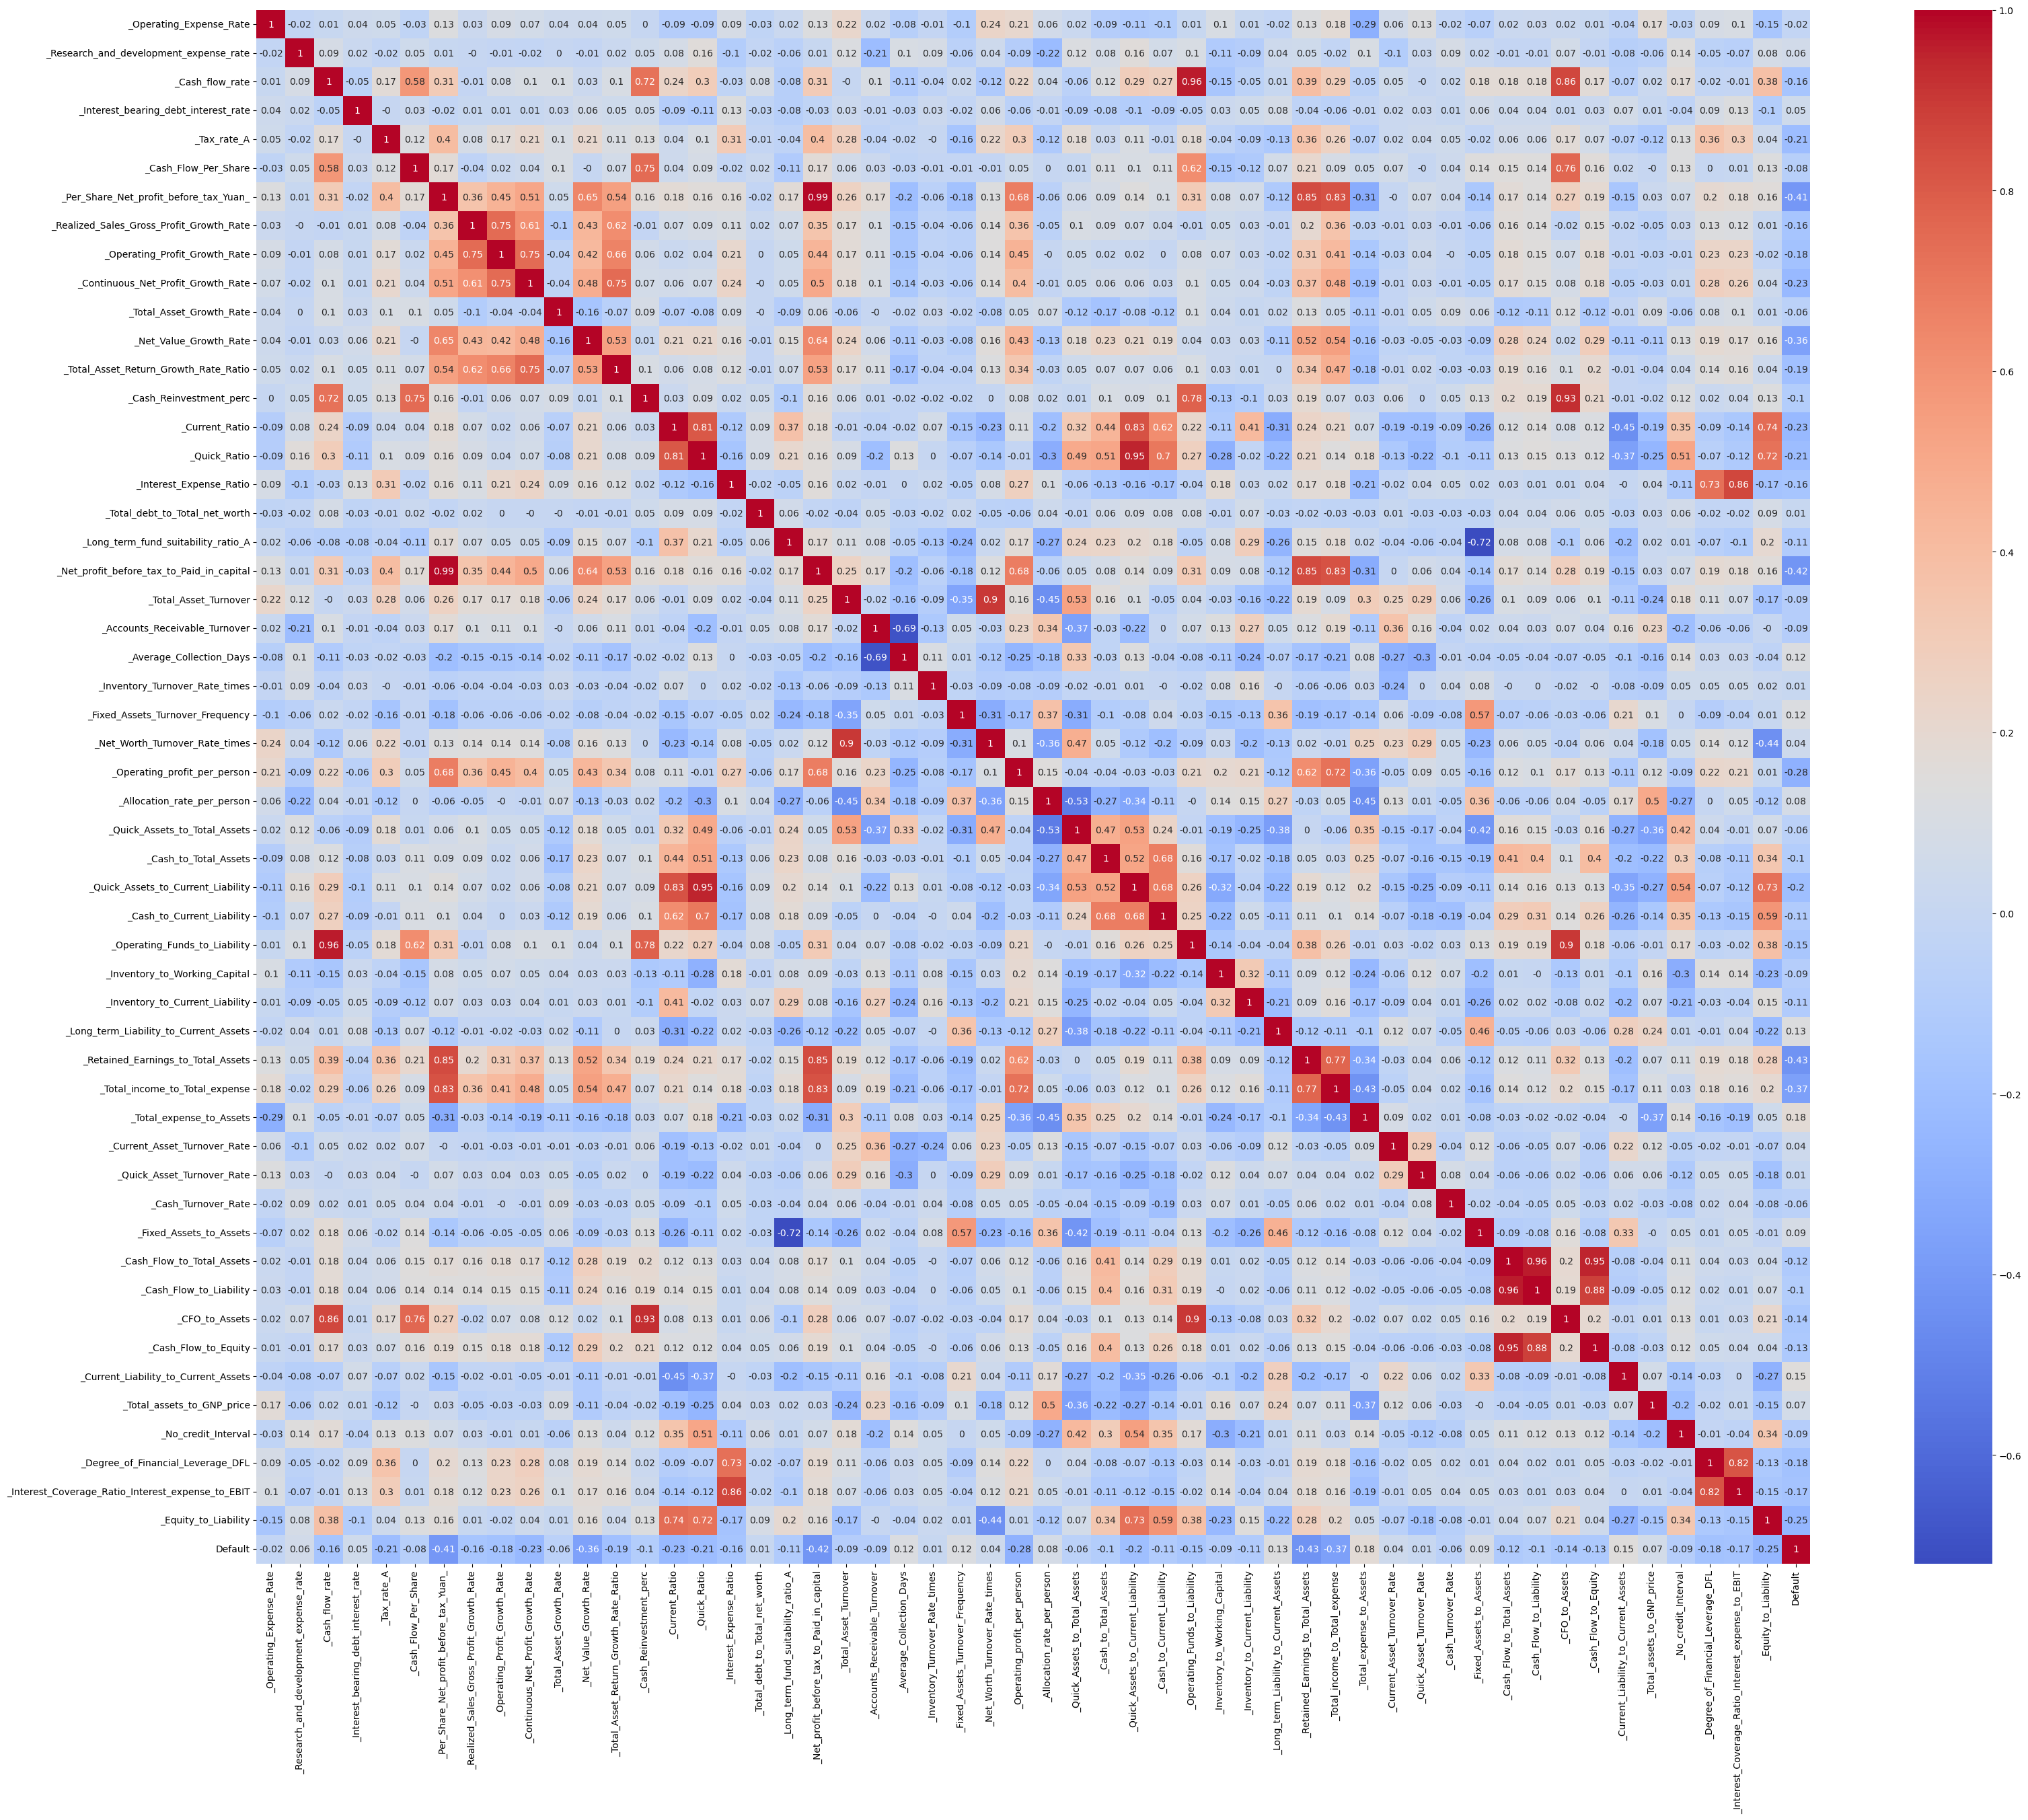

In [32]:
plt.figure(figsize=(40,30))
p=sns.heatmap(np.round(default_df.corr(),2), annot=True,cmap='coolwarm',square=True)

<b> High correlation can be observed in the following variables: </b> 
- _CFO_to_Assets (High correlation with multiple variables)
- _Quick_Ratio 
- _Net_Profit_before_tax
- _Net_Worth_Turnover_Rate
- _Quick_Assets_to_Current_Liability
- _Operating_Funds_to_Liability
- _Retained_Earnings_to_Total_Assets
- _Total_income_to_Total_expense
- _Cash_Flow_to_Equity

#### Converting the variable '_Liability_Assets_Flag' into float data type

In [33]:
default_df["_Liability_Assets_Flag"] = default_df["_Liability_Assets_Flag"].astype('float')

# Train-Test Split for model building

In [34]:
from sklearn.model_selection import train_test_split

X = default_df.drop("Default",axis=1)
y = default_df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = default_df.Default)

print("Train Size:{}\nTest Size:{}".format(X_train.shape,X_test.shape))

Train Size:(1378, 54)
Test Size:(680, 54)


In [35]:
print("Train Default Distribution:\n{}\n\nTest Default Distribution:\n{}".format(y_train.value_counts(normalize=True),y_test.value_counts(normalize=True)))

Train Default Distribution:
0    0.893324
1    0.106676
Name: Default, dtype: float64

Test Default Distribution:
0    0.892647
1    0.107353
Name: Default, dtype: float64


<b> As <i>stratify</i> was passed as an argument in the train-test split, equal distibution by percentage of the default variable can be seen in the test and train dataset.

# Model Building using Logistic Regression

<b> Selecting the most important features by evaluating the Variance Inflation Factors for different variables

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
    return(vif)

In [37]:
X_1 = default_df.drop('Default',axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Per_Share_Net_profit_before_tax_Yuan_,98.438003
19,_Net_profit_before_tax_to_Paid_in_capital,98.404214
43,_Cash_Flow_to_Total_Assets,46.443957
45,_CFO_to_Assets,28.304227
32,_Operating_Funds_to_Liability,21.145700
30,_Quick_Assets_to_Current_Liability,20.070251
44,_Cash_Flow_to_Liability,18.088584
2,_Cash_flow_rate,16.561174
46,_Cash_Flow_to_Equity,16.072721
15,_Quick_Ratio,12.476801


In [38]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
42,_Cash_Flow_to_Total_Assets,46.399976
44,_CFO_to_Assets,28.245637
31,_Operating_Funds_to_Liability,21.140430
29,_Quick_Assets_to_Current_Liability,20.063197
43,_Cash_Flow_to_Liability,18.088473
2,_Cash_flow_rate,16.557822
45,_Cash_Flow_to_Equity,16.031137
14,_Quick_Ratio,12.476313
12,_Cash_Reinvestment_perc,12.345905
19,_Total_Asset_Turnover,11.037687


In [39]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,_Operating_Profit_Growth_Rate,6.461157e+07
43,_CFO_to_Assets,2.811488e+01
31,_Operating_Funds_to_Liability,2.111159e+01
29,_Quick_Assets_to_Current_Liability,2.000407e+01
2,_Cash_flow_rate,1.654587e+01
14,_Quick_Ratio,1.244362e+01
12,_Cash_Reinvestment_perc,1.217981e+01
19,_Total_Asset_Turnover,1.103341e+01
13,_Current_Ratio,1.100392e+01
24,_Net_Worth_Turnover_Rate_times,1.078684e+01


In [40]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,_Continuous_Net_Profit_Growth_Rate,2.760124e+06
48,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,1.389157e+06
14,_Interest_Expense_Ratio,1.260366e+06
46,_No_credit_Interval,1.097307e+06
10,_Total_Asset_Return_Growth_Rate_Ratio,5.907594e+05
31,_Inventory_to_Working_Capital,2.527903e+05
6,_Realized_Sales_Gross_Profit_Growth_Rate,1.076820e+05
2,_Cash_flow_rate,6.409578e+04
43,_Cash_Flow_to_Equity,3.415551e+04
47,_Degree_of_Financial_Leverage_DFL,2.872792e+04


In [41]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
47,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,1.352624e+06
13,_Interest_Expense_Ratio,1.201898e+06
45,_No_credit_Interval,5.676441e+05
9,_Total_Asset_Return_Growth_Rate_Ratio,4.697231e+05
30,_Inventory_to_Working_Capital,2.279596e+05
6,_Realized_Sales_Gross_Profit_Growth_Rate,1.075522e+05
2,_Cash_flow_rate,6.318618e+04
42,_Cash_Flow_to_Equity,3.413494e+04
46,_Degree_of_Financial_Leverage_DFL,2.589068e+04
23,_Operating_profit_per_person,4.637121e+03


In [42]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
45,_No_credit_Interval,544703.827516
13,_Interest_Expense_Ratio,530384.806624
9,_Total_Asset_Return_Growth_Rate_Ratio,464713.697105
30,_Inventory_to_Working_Capital,227333.673844
6,_Realized_Sales_Gross_Profit_Growth_Rate,107549.677540
2,_Cash_flow_rate,62852.751774
40,_Cash_Flow_to_Liability,49078.634823
42,_Cash_Flow_to_Equity,34134.783900
33,_Retained_Earnings_to_Total_Assets,28620.895496
46,_Degree_of_Financial_Leverage_DFL,19089.124219


In [43]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
9,_Total_Asset_Return_Growth_Rate_Ratio,391650.800533
6,_Realized_Sales_Gross_Profit_Growth_Rate,107383.591214
2,_Cash_flow_rate,61914.360256
40,_Cash_Flow_to_Liability,49063.244650
33,_Retained_Earnings_to_Total_Assets,27833.270795
45,_Degree_of_Financial_Leverage_DFL,17533.479163
29,_Operating_Funds_to_Liability,10228.772257
10,_Cash_Reinvestment_perc,8694.493712
23,_Operating_profit_per_person,4609.117658
41,_CFO_to_Assets,3360.612416


In [44]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Realized_Sales_Gross_Profit_Growth_Rate,76913.764521
39,_Cash_Flow_to_Liability,48960.261491
32,_Retained_Earnings_to_Total_Assets,27631.151550
44,_Degree_of_Financial_Leverage_DFL,16379.229150
28,_Operating_Funds_to_Liability,10224.465870
9,_Cash_Reinvestment_perc,8526.955132
22,_Operating_profit_per_person,4427.080375
40,_CFO_to_Assets,3290.129641
5,_Cash_Flow_Per_Share,1272.069177
15,_Net_profit_before_tax_to_Paid_in_capital,787.116608


In [45]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
38,_Cash_Flow_to_Liability,48628.035659
31,_Retained_Earnings_to_Total_Assets,26916.290734
43,_Degree_of_Financial_Leverage_DFL,16136.910489
27,_Operating_Funds_to_Liability,10217.376190
8,_Cash_Reinvestment_perc,8412.755839
21,_Operating_profit_per_person,4365.105955
39,_CFO_to_Assets,3255.174969
5,_Cash_Flow_Per_Share,1271.606323
14,_Net_profit_before_tax_to_Paid_in_capital,781.879105
32,_Total_income_to_Total_expense,538.205593


In [46]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
28,_Inventory_to_Working_Capital,185571.914652
2,_Cash_flow_rate,60939.794669
31,_Retained_Earnings_to_Total_Assets,26882.093698
42,_Degree_of_Financial_Leverage_DFL,16048.655453
39,_Cash_Flow_to_Equity,9148.225021
21,_Operating_profit_per_person,4365.047181
5,_Cash_Flow_Per_Share,1271.595137
14,_Net_profit_before_tax_to_Paid_in_capital,773.301025
32,_Total_income_to_Total_expense,537.525880
7,_Net_Value_Growth_Rate,186.712608


In [47]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,_Cash_flow_rate,60020.528297
30,_Retained_Earnings_to_Total_Assets,26494.317636
41,_Degree_of_Financial_Leverage_DFL,14902.127006
38,_Cash_Flow_to_Equity,9102.731357
21,_Operating_profit_per_person,4363.492605
5,_Cash_Flow_Per_Share,1271.588747
14,_Net_profit_before_tax_to_Paid_in_capital,773.287152
31,_Total_income_to_Total_expense,534.209747
7,_Net_Value_Growth_Rate,186.657147
13,_Long_term_fund_suitability_ratio_A,89.860948


In [48]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
29,_Retained_Earnings_to_Total_Assets,26382.103610
40,_Degree_of_Financial_Leverage_DFL,14646.099492
37,_Cash_Flow_to_Equity,9034.326979
20,_Operating_profit_per_person,4363.480105
4,_Cash_Flow_Per_Share,1269.349684
13,_Net_profit_before_tax_to_Paid_in_capital,768.831015
30,_Total_income_to_Total_expense,527.054139
6,_Net_Value_Growth_Rate,185.171869
12,_Long_term_fund_suitability_ratio_A,89.849934
24,_Quick_Assets_to_Current_Liability,57.904894


In [49]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,_Interest_Expense_Ratio,34481.710189
39,_Degree_of_Financial_Leverage_DFL,14558.750146
36,_Cash_Flow_to_Equity,9030.713118
20,_Operating_profit_per_person,4361.825236
4,_Cash_Flow_Per_Share,1259.685868
13,_Net_profit_before_tax_to_Paid_in_capital,581.554918
29,_Total_income_to_Total_expense,523.207070
6,_Net_Value_Growth_Rate,185.130385
12,_Long_term_fund_suitability_ratio_A,89.723580
24,_Quick_Assets_to_Current_Liability,57.902799


In [50]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
38,_Degree_of_Financial_Leverage_DFL,7285.738904
35,_Cash_Flow_to_Equity,6677.380684
19,_Operating_profit_per_person,4067.159863
4,_Cash_Flow_Per_Share,1225.588255
12,_Net_profit_before_tax_to_Paid_in_capital,580.193900
28,_Total_income_to_Total_expense,521.790289
6,_Net_Value_Growth_Rate,178.801729
11,_Long_term_fund_suitability_ratio_A,88.817078
23,_Quick_Assets_to_Current_Liability,57.851318
8,_Current_Ratio,44.582299


In [51]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
35,_Cash_Flow_to_Equity,5069.031241
19,_Operating_profit_per_person,3723.500507
4,_Cash_Flow_Per_Share,1202.261786
12,_Net_profit_before_tax_to_Paid_in_capital,578.722031
28,_Total_income_to_Total_expense,521.554273
6,_Net_Value_Growth_Rate,178.770270
11,_Long_term_fund_suitability_ratio_A,88.539690
23,_Quick_Assets_to_Current_Liability,57.847983
8,_Current_Ratio,44.566824
18,_Net_Worth_Turnover_Rate_times,43.329890


In [52]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,_Cash_Reinvestment_perc,4298.945551
19,_Operating_profit_per_person,3167.883157
25,_Operating_Funds_to_Liability,2961.664548
34,_CFO_to_Assets,1231.886821
4,_Cash_Flow_Per_Share,1157.151347
12,_Net_profit_before_tax_to_Paid_in_capital,578.603019
28,_Total_income_to_Total_expense,520.389660
6,_Net_Value_Growth_Rate,177.518785
11,_Long_term_fund_suitability_ratio_A,88.465903
23,_Quick_Assets_to_Current_Liability,57.817462


In [53]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
24,_Operating_Funds_to_Liability,2927.247341
18,_Operating_profit_per_person,2125.499663
4,_Cash_Flow_Per_Share,978.194088
33,_CFO_to_Assets,829.798998
11,_Net_profit_before_tax_to_Paid_in_capital,555.011725
27,_Total_income_to_Total_expense,503.101117
6,_Net_Value_Growth_Rate,170.157268
10,_Long_term_fund_suitability_ratio_A,88.313528
22,_Quick_Assets_to_Current_Liability,57.817459
7,_Current_Ratio,44.519245


In [54]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
18,_Operating_profit_per_person,1053.608952
4,_Cash_Flow_Per_Share,977.974052
11,_Net_profit_before_tax_to_Paid_in_capital,554.010498
26,_Total_income_to_Total_expense,502.026021
32,_CFO_to_Assets,316.297849
6,_Net_Value_Growth_Rate,168.153052
10,_Long_term_fund_suitability_ratio_A,88.302589
22,_Quick_Assets_to_Current_Liability,57.795079
7,_Current_Ratio,44.415110
17,_Net_Worth_Turnover_Rate_times,42.780005


In [55]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,_Cash_Flow_Per_Share,592.774723
11,_Net_profit_before_tax_to_Paid_in_capital,551.931628
25,_Total_income_to_Total_expense,434.194775
31,_CFO_to_Assets,300.704071
6,_Net_Value_Growth_Rate,165.171086
10,_Long_term_fund_suitability_ratio_A,79.101346
21,_Quick_Assets_to_Current_Liability,57.752903
7,_Current_Ratio,44.412976
17,_Net_Worth_Turnover_Rate_times,41.553389
8,_Quick_Ratio,33.269652


In [56]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,_Net_profit_before_tax_to_Paid_in_capital,551.819474
24,_Total_income_to_Total_expense,417.939699
5,_Net_Value_Growth_Rate,161.670522
30,_CFO_to_Assets,132.352702
9,_Long_term_fund_suitability_ratio_A,72.384483
20,_Quick_Assets_to_Current_Liability,57.671459
6,_Current_Ratio,44.337333
16,_Net_Worth_Turnover_Rate_times,40.497619
7,_Quick_Ratio,33.204341
11,_Total_Asset_Turnover,31.003746


In [57]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
23,_Total_income_to_Total_expense,210.004111
5,_Net_Value_Growth_Rate,133.270918
29,_CFO_to_Assets,123.834336
9,_Long_term_fund_suitability_ratio_A,72.299115
19,_Quick_Assets_to_Current_Liability,57.323019
6,_Current_Ratio,44.333309
15,_Net_Worth_Turnover_Rate_times,40.011515
7,_Quick_Ratio,32.928949
10,_Total_Asset_Turnover,30.170980
17,_Quick_Assets_to_Total_Assets,20.215269


In [58]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
28,_CFO_to_Assets,99.677376
5,_Net_Value_Growth_Rate,80.135273
9,_Long_term_fund_suitability_ratio_A,69.097136
19,_Quick_Assets_to_Current_Liability,57.286666
6,_Current_Ratio,44.333200
15,_Net_Worth_Turnover_Rate_times,39.958163
7,_Quick_Ratio,32.918971
10,_Total_Asset_Turnover,30.170796
17,_Quick_Assets_to_Total_Assets,20.103891
31,_Equity_to_Liability,19.178782


In [59]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,_Net_Value_Growth_Rate,72.772438
9,_Long_term_fund_suitability_ratio_A,59.911536
19,_Quick_Assets_to_Current_Liability,57.231063
6,_Current_Ratio,44.331481
15,_Net_Worth_Turnover_Rate_times,39.425819
7,_Quick_Ratio,32.904144
10,_Total_Asset_Turnover,30.095198
30,_Equity_to_Liability,18.466841
27,_Fixed_Assets_to_Assets,9.270702
12,_Average_Collection_Days,8.580860


In [60]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
18,_Quick_Assets_to_Current_Liability,57.226968
5,_Current_Ratio,44.329310
8,_Long_term_fund_suitability_ratio_A,39.360188
14,_Net_Worth_Turnover_Rate_times,38.174080
6,_Quick_Ratio,32.903048
9,_Total_Asset_Turnover,30.087185
29,_Equity_to_Liability,17.918253
11,_Average_Collection_Days,8.258365
26,_Fixed_Assets_to_Assets,7.551578
10,_Accounts_Receivable_Turnover,7.378865


In [61]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,_Long_term_fund_suitability_ratio_A,38.399283
14,_Net_Worth_Turnover_Rate_times,38.169498
5,_Current_Ratio,33.443453
9,_Total_Asset_Turnover,30.041827
28,_Equity_to_Liability,17.069759
11,_Average_Collection_Days,8.209584
6,_Quick_Ratio,7.525484
25,_Fixed_Assets_to_Assets,7.492749
10,_Accounts_Receivable_Turnover,7.362302
19,_Inventory_to_Current_Liability,6.388658


In [62]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
13,_Net_Worth_Turnover_Rate_times,36.341888
5,_Current_Ratio,32.812335
8,_Total_Asset_Turnover,29.839170
27,_Equity_to_Liability,15.142209
6,_Quick_Ratio,7.433249
10,_Average_Collection_Days,6.733613
9,_Accounts_Receivable_Turnover,6.363848
24,_Fixed_Assets_to_Assets,6.313640
17,_Cash_to_Current_Liability,6.187372
18,_Inventory_to_Current_Liability,6.185090


In [63]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,_Current_Ratio,32.689014
26,_Equity_to_Liability,13.941249
8,_Total_Asset_Turnover,9.332557
6,_Quick_Ratio,7.270233
10,_Average_Collection_Days,6.524538
23,_Fixed_Assets_to_Assets,6.278796
9,_Accounts_Receivable_Turnover,6.247433
17,_Inventory_to_Current_Liability,6.172830
16,_Cash_to_Current_Liability,6.155878
13,_Allocation_rate_per_person,4.932708


In [64]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,_Quick_Ratio,13.138122
25,_Equity_to_Liability,11.692152
7,_Total_Asset_Turnover,9.332474
9,_Average_Collection_Days,6.516001
22,_Fixed_Assets_to_Assets,6.245734
8,_Accounts_Receivable_Turnover,6.229274
15,_Cash_to_Current_Liability,6.145359
12,_Allocation_rate_per_person,4.920810
18,_Total_expense_to_Assets,4.772195
4,_Total_Asset_Growth_Rate,4.384179


In [65]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Total_Asset_Turnover,9.292320
24,_Equity_to_Liability,7.144978
8,_Average_Collection_Days,6.401976
21,_Fixed_Assets_to_Assets,6.151262
7,_Accounts_Receivable_Turnover,6.105365
14,_Cash_to_Current_Liability,5.037607
11,_Allocation_rate_per_person,4.887699
17,_Total_expense_to_Assets,4.752330
4,_Total_Asset_Growth_Rate,4.364304
13,_Cash_to_Total_Assets,4.150050


In [66]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
23,_Equity_to_Liability,6.994989
7,_Average_Collection_Days,6.072735
20,_Fixed_Assets_to_Assets,6.037034
6,_Accounts_Receivable_Turnover,6.023399
13,_Cash_to_Current_Liability,5.023071
10,_Allocation_rate_per_person,4.728663
16,_Total_expense_to_Assets,4.612619
4,_Total_Asset_Growth_Rate,4.364082
12,_Cash_to_Total_Assets,4.136644
2,_Interest_bearing_debt_interest_rate,3.614329


In [67]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,_Average_Collection_Days,5.918935
6,_Accounts_Receivable_Turnover,5.880422
20,_Fixed_Assets_to_Assets,5.802127
10,_Allocation_rate_per_person,4.684789
16,_Total_expense_to_Assets,4.609292
4,_Total_Asset_Growth_Rate,4.259107
12,_Cash_to_Total_Assets,4.121356
13,_Cash_to_Current_Liability,3.819895
2,_Interest_bearing_debt_interest_rate,3.614153
14,_Inventory_to_Current_Liability,3.169511


In [68]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,_Quick_Assets_to_Total_Assets,5.864298
19,_Fixed_Assets_to_Assets,5.748229
6,_Accounts_Receivable_Turnover,4.673055
9,_Allocation_rate_per_person,4.503289
15,_Total_expense_to_Assets,4.498732
4,_Total_Asset_Growth_Rate,4.147885
11,_Cash_to_Total_Assets,4.030525
12,_Cash_to_Current_Liability,3.813897
2,_Interest_bearing_debt_interest_rate,3.569921
13,_Inventory_to_Current_Liability,3.084123


In [69]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
18,_Fixed_Assets_to_Assets,5.602037
6,_Accounts_Receivable_Turnover,4.597116
9,_Allocation_rate_per_person,4.492279
4,_Total_Asset_Growth_Rate,3.973626
11,_Cash_to_Current_Liability,3.813450
14,_Total_expense_to_Assets,3.487134
10,_Cash_to_Total_Assets,3.484295
2,_Interest_bearing_debt_interest_rate,3.475574
12,_Inventory_to_Current_Liability,3.064904
20,_Total_assets_to_GNP_price,2.929485


In [70]:
high_VF_col = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).values[0][0]
X_1 = X_1.drop(high_VF_col, axis = 1)
calc_vif(X_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Accounts_Receivable_Turnover,4.596262
9,_Allocation_rate_per_person,3.962626
4,_Total_Asset_Growth_Rate,3.913119
11,_Cash_to_Current_Liability,3.733657
14,_Total_expense_to_Assets,3.450555
10,_Cash_to_Total_Assets,3.435772
2,_Interest_bearing_debt_interest_rate,3.434136
12,_Inventory_to_Current_Liability,2.948929
19,_Total_assets_to_GNP_price,2.746104
15,_Current_Asset_Turnover_Rate,2.313642


<b> It can be observed that the VIF values of all the variables are below 5 which means that all the correlated variables have been removed from the dataset. We can now proceed with the Logistic Regression model building.

## Model 1

In [71]:
import statsmodels.formula.api as SM

Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

model_columns = calc_vif(X_1).sort_values(by = 'VIF', ascending = False).variables
model_columns

6              _Accounts_Receivable_Turnover
9                _Allocation_rate_per_person
4                   _Total_Asset_Growth_Rate
11                _Cash_to_Current_Liability
14                  _Total_expense_to_Assets
10                     _Cash_to_Total_Assets
2       _Interest_bearing_debt_interest_rate
12           _Inventory_to_Current_Liability
19                _Total_assets_to_GNP_price
15              _Current_Asset_Turnover_Rate
18      _Current_Liability_to_Current_Assets
13    _Long_term_Liability_to_Current_Assets
8           _Fixed_Assets_Turnover_Frequency
17                       _Cash_Turnover_Rate
16                _Quick_Asset_Turnover_Rate
3                                _Tax_rate_A
7             _Inventory_Turnover_Rate_times
1     _Research_and_development_expense_rate
0                    _Operating_Expense_Rate
20                    _Liability_Assets_Flag
5             _Total_debt_to_Total_net_worth
Name: variables, dtype: object

In [72]:
f_1 = 'Default ~ _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Total_Asset_Growth_Rate + _Cash_to_Current_Liability + _Total_expense_to_Assets + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate + _Inventory_to_Current_Liability + _Total_assets_to_GNP_price + _Current_Asset_Turnover_Rate + _Current_Liability_to_Current_Assets + _Long_term_Liability_to_Current_Assets + _Fixed_Assets_Turnover_Frequency + _Cash_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Tax_rate_A + _Inventory_Turnover_Rate_times + _Research_and_development_expense_rate + _Operating_Expense_Rate + _Liability_Assets_Flag + _Total_debt_to_Total_net_worth'
model_1 = SM.logit(formula = f_1, data=Default_train).fit()

         Current function value: 0.245785
         Iterations: 35


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [73]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1356
Method:                           MLE   Df Model:                           21
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.2761
Time:                        00:26:04   Log-Likelihood:                -338.69
converged:                      False   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 8.784e-43
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.4692      0.529     -6.557      0.000      -4.506      -2.432
_Accounts_Receivable_Turnover           -620.4251    142.868     -4.343      0.000    -900.441    -340.409
_Allocation_rate_per_person               38.7310      9.214      4.204      0.000      20.672      56.790
_Total_Asset_Growth_Rate               -4.524e-11   3.76e-11     -1.204      0.229   -1.19e-10    2.84e-11
_Cash_to_Current_Liability               -39.5344     28.285     -1.398      0.162     -94.971      15.903
_Total_expense_to_Assets                  50.4959      6.729      7.504      0.000      37.308      63.684
_Cash_to_Total_Assets                     -4.4968      2.098     -2.143      0.032      -8.609      -0.385
_Interest_bearing_debt_interest_rate     988.1986    366.753      2.694      0.007     269.377    1707.020
_Inventory_to_Current_Liability          -22.2366     17.208     -1.292      0.196     -55.963      11.490
_Total_assets_to_GNP_price                39.1661     23.375      1.676      0.094      -6.649      84.981
_Current_Asset_Turnover_Rate             -96.5336    104.891     -0.920      0.357    -302.116     109.049
_Current_Liability_to_Current_Assets       7.3226      2.070      3.537      0.000       3.265      11.381
_Long_term_Liability_to_Current_Assets    -8.6165     12.685     -0.679      0.497     -33.479      16.246
_Fixed_Assets_Turnover_Frequency          15.5592     13.701      1.136      0.256     -11.295      42.414
_Cash_Turnover_Rate                    -1.034e-10   4.25e-11     -2.432      0.015   -1.87e-10   -2.01e-11
_Quick_Asset_Turnover_Rate              1.595e-11   3.12e-11      0.510      0.610   -4.53e-11    7.72e-11
_Tax_rate_A                               -6.6870      1.317     -5.079      0.000      -9.268      -4.106
_Inventory_Turnover_Rate_times          2.891e-11   3.43e-11      0.842      0.400   -3.84e-11    9.62e-11
_Research_and_development_expense_rate  2.181e-10   6.67e-11      3.270      0.001    8.74e-11    3.49e-10
_Operating_Expense_Rate                 3.284e-11   3.44e-11      0.955      0.340   -3.46e-11       1e-10
_Liability_Assets_Flag                    15.7957   6368.868      0.002      0.998   -1.25e+04    1.25e+04
_Total_debt_to_Total_net_worth          3.935e-10    2.4e-10      1.641      0.101   -7.64e-11    8.63e-10
==========================================================================================================
"""

<b> <i>_Liability_Assets_Flag </i> is an insignificant variable, therefore, we will eliminate it.

## Model 2

In [74]:
model_2 = SM.logit(formula = 'Default ~ _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Total_Asset_Growth_Rate + _Cash_to_Current_Liability + _Total_expense_to_Assets + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate + _Inventory_to_Current_Liability + _Total_assets_to_GNP_price + _Current_Asset_Turnover_Rate + _Current_Liability_to_Current_Assets + _Long_term_Liability_to_Current_Assets + _Fixed_Assets_Turnover_Frequency + _Cash_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Tax_rate_A + _Inventory_Turnover_Rate_times + _Research_and_development_expense_rate + _Operating_Expense_Rate + _Total_debt_to_Total_net_worth', data=Default_train).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.245904
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1357
Method:                           MLE   Df Model:                           20
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.2757
Time:                        00:26:04   Log-Likelihood:                -338.86
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.800e-43
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.4747      0.529     -6.565      0.000      -4.512      -2.437
_Accounts_Receivable_Turnover           -622.9221    142.845     -4.361      0.000    -902.893    -342.951
_Allocation_rate_per_person               38.9739      9.201      4.236      0.000      20.940      57.008
_Total_Asset_Growth_Rate               -4.591e-11   3.75e-11     -1.223      0.221   -1.19e-10    2.77e-11
_Cash_to_Current_Liability               -39.7755     28.305     -1.405      0.160     -95.252      15.701
_Total_expense_to_Assets                  50.8110      6.696      7.588      0.000      37.687      63.935
_Cash_to_Total_Assets                     -4.5042      2.099     -2.146      0.032      -8.619      -0.390
_Interest_bearing_debt_interest_rate     983.4533    366.881      2.681      0.007     264.380    1702.526
_Inventory_to_Current_Liability          -22.2750     17.224     -1.293      0.196     -56.033      11.483
_Total_assets_to_GNP_price                39.8843     23.313      1.711      0.087      -5.808      85.576
_Current_Asset_Turnover_Rate             -99.0550    104.807     -0.945      0.345    -304.472     106.362
_Current_Liability_to_Current_Assets       7.3561      2.067      3.558      0.000       3.304      11.408
_Long_term_Liability_to_Current_Assets    -8.3730     12.655     -0.662      0.508     -33.177      16.431
_Fixed_Assets_Turnover_Frequency          15.2600     13.689      1.115      0.265     -11.570      42.090
_Cash_Turnover_Rate                    -1.037e-10   4.25e-11     -2.440      0.015   -1.87e-10   -2.04e-11
_Quick_Asset_Turnover_Rate              1.574e-11   3.13e-11      0.504      0.614   -4.55e-11     7.7e-11
_Tax_rate_A                               -6.6807      1.317     -5.075      0.000      -9.261      -4.100
_Inventory_Turnover_Rate_times          2.869e-11   3.44e-11      0.835      0.404   -3.87e-11     9.6e-11
_Research_and_development_expense_rate  2.188e-10   6.67e-11      3.280      0.001    8.81e-11     3.5e-10
_Operating_Expense_Rate                 3.274e-11   3.44e-11      0.951      0.341   -3.47e-11       1e-10
_Total_debt_to_Total_net_worth          3.935e-10    2.4e-10      1.641      0.101   -7.64e-11    8.63e-10
==========================================================================================================
"""

<b> <i>_Quick_Asset_Turnover_Rate </i> is still insignificant, therefore, we will eliminate it

## Model 3

In [75]:
model_3 = SM.logit(formula = 'Default ~ _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Total_Asset_Growth_Rate + _Cash_to_Current_Liability + _Total_expense_to_Assets + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate + _Inventory_to_Current_Liability + _Total_assets_to_GNP_price + _Current_Asset_Turnover_Rate + _Current_Liability_to_Current_Assets + _Long_term_Liability_to_Current_Assets + _Fixed_Assets_Turnover_Frequency + _Cash_Turnover_Rate + _Tax_rate_A + _Inventory_Turnover_Rate_times + _Research_and_development_expense_rate + _Operating_Expense_Rate + _Total_debt_to_Total_net_worth', data=Default_train).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.245995
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1358
Method:                           MLE   Df Model:                           19
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.2754
Time:                        00:26:04   Log-Likelihood:                -338.98
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 8.401e-44
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.4670      0.529     -6.559      0.000      -4.503      -2.431
_Accounts_Receivable_Turnover           -613.2720    141.016     -4.349      0.000    -889.658    -336.886
_Allocation_rate_per_person               38.6841      9.174      4.217      0.000      20.704      56.664
_Total_Asset_Growth_Rate               -4.505e-11   3.75e-11     -1.201      0.230   -1.19e-10    2.85e-11
_Cash_to_Current_Liability               -41.0032     28.227     -1.453      0.146     -96.327      14.321
_Total_expense_to_Assets                  50.8536      6.691      7.600      0.000      37.740      63.968
_Cash_to_Total_Assets                     -4.5277      2.099     -2.157      0.031      -8.643      -0.413
_Interest_bearing_debt_interest_rate     983.7786    366.326      2.686      0.007     265.792    1701.765
_Inventory_to_Current_Liability          -21.8775     17.153     -1.275      0.202     -55.496      11.741
_Total_assets_to_GNP_price                39.7066     23.323      1.702      0.089      -6.006      85.419
_Current_Asset_Turnover_Rate             -87.6557    102.640     -0.854      0.393    -288.826     113.514
_Current_Liability_to_Current_Assets       7.2920      2.061      3.538      0.000       3.252      11.332
_Long_term_Liability_to_Current_Assets    -7.7115     12.569     -0.614      0.540     -32.346      16.923
_Fixed_Assets_Turnover_Frequency          15.1208     13.683      1.105      0.269     -11.697      41.939
_Cash_Turnover_Rate                    -1.022e-10   4.23e-11     -2.416      0.016   -1.85e-10   -1.93e-11
_Tax_rate_A                               -6.6409      1.314     -5.055      0.000      -9.216      -4.066
_Inventory_Turnover_Rate_times          2.942e-11   3.43e-11      0.858      0.391   -3.78e-11    9.67e-11
_Research_and_development_expense_rate  2.207e-10   6.66e-11      3.313      0.001    9.01e-11    3.51e-10
_Operating_Expense_Rate                 3.473e-11   3.42e-11      1.015      0.310   -3.23e-11    1.02e-10
_Total_debt_to_Total_net_worth          3.918e-10   2.39e-10      1.639      0.101   -7.68e-11     8.6e-10
==========================================================================================================
"""

<b> <i>_Long_term_Liability_to_Current_Assets </i> is still insignificant, therefore, we will eliminate it

## Model 4

In [76]:
model_4 = SM.logit(formula = 'Default ~ _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Total_Asset_Growth_Rate + _Cash_to_Current_Liability + _Total_expense_to_Assets + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate + _Inventory_to_Current_Liability + _Total_assets_to_GNP_price + _Current_Asset_Turnover_Rate + _Current_Liability_to_Current_Assets + _Fixed_Assets_Turnover_Frequency + _Cash_Turnover_Rate + _Tax_rate_A + _Inventory_Turnover_Rate_times + _Research_and_development_expense_rate + _Operating_Expense_Rate + _Total_debt_to_Total_net_worth', data=Default_train).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.246132
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1359
Method:                           MLE   Df Model:                           18
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.2750
Time:                        00:26:04   Log-Likelihood:                -339.17
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.605e-44
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.4854      0.528     -6.606      0.000      -4.520      -2.451
_Accounts_Receivable_Turnover           -612.3332    141.031     -4.342      0.000    -888.750    -335.917
_Allocation_rate_per_person               38.2126      9.144      4.179      0.000      20.290      56.135
_Total_Asset_Growth_Rate               -4.588e-11   3.74e-11     -1.227      0.220   -1.19e-10    2.74e-11
_Cash_to_Current_Liability               -41.2373     28.391     -1.452      0.146     -96.882      14.408
_Total_expense_to_Assets                  50.9915      6.688      7.624      0.000      37.883      64.100
_Cash_to_Total_Assets                     -4.4448      2.099     -2.118      0.034      -8.558      -0.331
_Interest_bearing_debt_interest_rate     965.9797    366.380      2.637      0.008     247.887    1684.072
_Inventory_to_Current_Liability          -20.3560     16.951     -1.201      0.230     -53.580      12.868
_Total_assets_to_GNP_price                36.8399     22.832      1.614      0.107      -7.910      81.590
_Current_Asset_Turnover_Rate             -89.6987    102.558     -0.875      0.382    -290.709     111.312
_Current_Liability_to_Current_Assets       7.0580      2.000      3.529      0.000       3.138      10.978
_Fixed_Assets_Turnover_Frequency          12.9460     13.230      0.979      0.328     -12.984      38.876
_Cash_Turnover_Rate                    -1.012e-10   4.23e-11     -2.394      0.017   -1.84e-10   -1.84e-11
_Tax_rate_A                               -6.6001      1.312     -5.029      0.000      -9.172      -4.028
_Inventory_Turnover_Rate_times          2.722e-11   3.41e-11      0.799      0.425   -3.96e-11     9.4e-11
_Research_and_development_expense_rate  2.164e-10   6.61e-11      3.273      0.001    8.68e-11    3.46e-10
_Operating_Expense_Rate                 3.666e-11   3.41e-11      1.076      0.282   -3.01e-11    1.03e-10
_Total_debt_to_Total_net_worth          3.987e-10   2.37e-10      1.681      0.093   -6.61e-11    8.63e-10
==========================================================================================================
"""

<b> <i>_Inventory_Turnover_Rate_times </i> is still insignificant, therefore, we will eliminate it

## Model 5

In [77]:
model_5 = SM.logit(formula = 'Default ~ _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Total_Asset_Growth_Rate + _Cash_to_Current_Liability + _Total_expense_to_Assets + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate + _Inventory_to_Current_Liability + _Total_assets_to_GNP_price + _Current_Asset_Turnover_Rate + _Current_Liability_to_Current_Assets + _Fixed_Assets_Turnover_Frequency + _Cash_Turnover_Rate + _Tax_rate_A + _Research_and_development_expense_rate + _Operating_Expense_Rate + _Total_debt_to_Total_net_worth', data=Default_train).fit()
model_5.summary()

Optimization terminated successfully.
         Current function value: 0.246360
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1360
Method:                           MLE   Df Model:                           17
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.2744
Time:                        00:26:04   Log-Likelihood:                -339.48
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 8.834e-45
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.4360      0.524     -6.563      0.000      -4.462      -2.410
_Accounts_Receivable_Turnover           -615.8156    140.631     -4.379      0.000    -891.447    -340.185
_Allocation_rate_per_person               37.9522      9.094      4.173      0.000      20.128      55.777
_Total_Asset_Growth_Rate               -4.537e-11   3.74e-11     -1.214      0.225   -1.19e-10    2.79e-11
_Cash_to_Current_Liability               -42.5246     28.306     -1.502      0.133     -98.003      12.954
_Total_expense_to_Assets                  51.0728      6.682      7.643      0.000      37.976      64.169
_Cash_to_Total_Assets                     -4.4519      2.095     -2.125      0.034      -8.558      -0.346
_Interest_bearing_debt_interest_rate     968.3092    365.430      2.650      0.008     252.079    1684.539
_Inventory_to_Current_Liability          -17.7654     16.477     -1.078      0.281     -50.060      14.529
_Total_assets_to_GNP_price                35.5874     22.729      1.566      0.117      -8.961      80.136
_Current_Asset_Turnover_Rate             -97.1080    101.807     -0.954      0.340    -296.647     102.430
_Current_Liability_to_Current_Assets       6.9719      1.990      3.503      0.000       3.071      10.873
_Fixed_Assets_Turnover_Frequency          13.8427     13.153      1.052      0.293     -11.937      39.622
_Cash_Turnover_Rate                    -1.009e-10   4.23e-11     -2.387      0.017   -1.84e-10    -1.8e-11
_Tax_rate_A                               -6.5696      1.308     -5.024      0.000      -9.132      -4.007
_Research_and_development_expense_rate  2.201e-10    6.6e-11      3.333      0.001    9.07e-11     3.5e-10
_Operating_Expense_Rate                 3.838e-11    3.4e-11      1.129      0.259   -2.83e-11    1.05e-10
_Total_debt_to_Total_net_worth           3.94e-10   2.37e-10      1.660      0.097   -7.13e-11    8.59e-10
==========================================================================================================
"""

<b> <i> _Current_Asset_Turnover_Rate </i> is still insignificant, therefore, we will eliminate it

## Model 6

In [78]:
model_6 = SM.logit(formula = 'Default ~ _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Total_Asset_Growth_Rate + _Cash_to_Current_Liability + _Total_expense_to_Assets + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate + _Inventory_to_Current_Liability + _Total_assets_to_GNP_price + _Current_Liability_to_Current_Assets + _Fixed_Assets_Turnover_Frequency + _Cash_Turnover_Rate + _Tax_rate_A + _Research_and_development_expense_rate + _Operating_Expense_Rate + _Total_debt_to_Total_net_worth', data=Default_train).fit()
model_6.summary()

Optimization terminated successfully.
         Current function value: 0.246696
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1361
Method:                           MLE   Df Model:                           16
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.2734
Time:                        00:26:04   Log-Likelihood:                -339.95
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 3.349e-45
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.4107      0.522     -6.540      0.000      -4.433      -2.388
_Accounts_Receivable_Turnover           -654.1930    135.288     -4.836      0.000    -919.352    -389.034
_Allocation_rate_per_person               37.1946      9.048      4.111      0.000      19.461      54.928
_Total_Asset_Growth_Rate                -4.38e-11   3.73e-11     -1.173      0.241   -1.17e-10    2.94e-11
_Cash_to_Current_Liability               -42.9210     28.414     -1.511      0.131     -98.612      12.770
_Total_expense_to_Assets                  49.7170      6.497      7.652      0.000      36.982      62.452
_Cash_to_Total_Assets                     -4.3407      2.097     -2.070      0.038      -8.451      -0.230
_Interest_bearing_debt_interest_rate     969.5615    365.283      2.654      0.008     253.620    1685.503
_Inventory_to_Current_Liability          -15.6597     16.225     -0.965      0.334     -47.461      16.141
_Total_assets_to_GNP_price                33.8502     22.625      1.496      0.135     -10.495      78.195
_Current_Liability_to_Current_Assets       6.6525      1.958      3.397      0.001       2.814      10.491
_Fixed_Assets_Turnover_Frequency          13.8958     13.120      1.059      0.290     -11.819      39.611
_Cash_Turnover_Rate                    -9.998e-11   4.23e-11     -2.362      0.018   -1.83e-10    -1.7e-11
_Tax_rate_A                               -6.6816      1.303     -5.126      0.000      -9.236      -4.127
_Research_and_development_expense_rate  2.208e-10   6.59e-11      3.351      0.001    9.16e-11     3.5e-10
_Operating_Expense_Rate                 3.447e-11   3.37e-11      1.023      0.306   -3.16e-11    1.01e-10
_Total_debt_to_Total_net_worth          3.944e-10   2.36e-10      1.671      0.095   -6.81e-11    8.57e-10
==========================================================================================================
"""

<b> <i> _Inventory_to_Current_Liability </i> is still insignificant, therefore, we will eliminate it

## Model 7

In [79]:
model_7 = SM.logit(formula = 'Default ~ _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Total_Asset_Growth_Rate + _Cash_to_Current_Liability + _Total_expense_to_Assets + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate + _Total_assets_to_GNP_price + _Current_Liability_to_Current_Assets + _Fixed_Assets_Turnover_Frequency + _Cash_Turnover_Rate + _Tax_rate_A + _Research_and_development_expense_rate + _Operating_Expense_Rate + _Total_debt_to_Total_net_worth', data=Default_train).fit()
model_7.summary()

Optimization terminated successfully.
         Current function value: 0.247041
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1362
Method:                           MLE   Df Model:                           15
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.2724
Time:                        00:26:04   Log-Likelihood:                -340.42
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.248e-45
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.5336      0.506     -6.981      0.000      -4.526      -2.542
_Accounts_Receivable_Turnover           -681.9733    132.646     -5.141      0.000    -941.955    -421.992
_Allocation_rate_per_person               36.9784      9.008      4.105      0.000      19.323      54.633
_Total_Asset_Growth_Rate               -4.496e-11   3.73e-11     -1.206      0.228   -1.18e-10    2.81e-11
_Cash_to_Current_Liability               -45.5665     28.364     -1.606      0.108    -101.159      10.026
_Total_expense_to_Assets                  50.8317      6.392      7.953      0.000      38.304      63.359
_Cash_to_Total_Assets                     -4.2871      2.103     -2.038      0.042      -8.409      -0.165
_Interest_bearing_debt_interest_rate     930.0924    362.998      2.562      0.010     218.629    1641.556
_Total_assets_to_GNP_price                35.3099     22.600      1.562      0.118      -8.986      79.606
_Current_Liability_to_Current_Assets       6.8624      1.962      3.497      0.000       3.016      10.708
_Fixed_Assets_Turnover_Frequency          16.7489     12.688      1.320      0.187      -8.119      41.617
_Cash_Turnover_Rate                    -1.037e-10   4.21e-11     -2.463      0.014   -1.86e-10   -2.12e-11
_Tax_rate_A                               -6.6542      1.302     -5.111      0.000      -9.206      -4.103
_Research_and_development_expense_rate  2.252e-10   6.56e-11      3.431      0.001    9.66e-11    3.54e-10
_Operating_Expense_Rate                 3.829e-11   3.34e-11      1.147      0.251   -2.71e-11    1.04e-10
_Total_debt_to_Total_net_worth          3.816e-10   2.31e-10      1.650      0.099   -7.17e-11    8.35e-10
==========================================================================================================
"""

<b> <i> _Operating_Expense_Rate </i> is still insignificant, therefore, we will eliminate it

## Model 8

In [80]:
model_8 = SM.logit(formula = 'Default ~ _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Total_Asset_Growth_Rate + _Cash_to_Current_Liability + _Total_expense_to_Assets + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate + _Total_assets_to_GNP_price + _Current_Liability_to_Current_Assets + _Fixed_Assets_Turnover_Frequency + _Cash_Turnover_Rate + _Tax_rate_A + _Research_and_development_expense_rate + _Total_debt_to_Total_net_worth', data=Default_train).fit()
model_8.summary()

Optimization terminated successfully.
         Current function value: 0.247510
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1363
Method:                           MLE   Df Model:                           14
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.2710
Time:                        00:26:04   Log-Likelihood:                -341.07
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 5.296e-46
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.3852      0.487     -6.953      0.000      -4.340      -2.431
_Accounts_Receivable_Turnover           -674.6881    131.768     -5.120      0.000    -932.949    -416.427
_Allocation_rate_per_person               36.1644      8.969      4.032      0.000      18.586      53.742
_Total_Asset_Growth_Rate               -4.511e-11   3.72e-11     -1.212      0.225   -1.18e-10    2.78e-11
_Cash_to_Current_Liability               -48.1911     28.405     -1.697      0.090    -103.864       7.482
_Total_expense_to_Assets                  49.0696      6.180      7.940      0.000      36.956      61.183
_Cash_to_Total_Assets                     -4.2334      2.104     -2.012      0.044      -8.357      -0.110
_Interest_bearing_debt_interest_rate     930.8628    361.475      2.575      0.010     222.385    1639.341
_Total_assets_to_GNP_price                40.2976     22.090      1.824      0.068      -2.999      83.594
_Current_Liability_to_Current_Assets       6.7874      1.967      3.451      0.001       2.933      10.642
_Fixed_Assets_Turnover_Frequency          14.2121     12.493      1.138      0.255     -10.274      38.698
_Cash_Turnover_Rate                    -1.074e-10   4.19e-11     -2.566      0.010   -1.89e-10   -2.54e-11
_Tax_rate_A                               -6.7197      1.306     -5.145      0.000      -9.280      -4.160
_Research_and_development_expense_rate  2.286e-10   6.54e-11      3.498      0.000    1.01e-10    3.57e-10
_Total_debt_to_Total_net_worth          3.708e-10   2.29e-10      1.616      0.106   -7.88e-11     8.2e-10
==========================================================================================================
"""

<b> <i> _Fixed_Assets_Turnover_Frequency </i> is still insignificant, therefore, we will eliminate it

## Model 9

In [81]:
model_9 = SM.logit(formula = 'Default ~ _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Total_Asset_Growth_Rate + _Cash_to_Current_Liability + _Total_expense_to_Assets + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate + _Total_assets_to_GNP_price + _Current_Liability_to_Current_Assets + _Cash_Turnover_Rate + _Tax_rate_A + _Research_and_development_expense_rate + _Total_debt_to_Total_net_worth', data=Default_train).fit()
model_9.summary()

Optimization terminated successfully.
         Current function value: 0.247976
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1364
Method:                           MLE   Df Model:                           13
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.2696
Time:                        00:26:04   Log-Likelihood:                -341.71
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.165e-46
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.3129      0.482     -6.877      0.000      -4.257      -2.369
_Accounts_Receivable_Turnover           -691.7740    131.080     -5.277      0.000    -948.687    -434.861
_Allocation_rate_per_person               40.1799      8.221      4.888      0.000      24.067      56.292
_Total_Asset_Growth_Rate                -4.69e-11   3.72e-11     -1.261      0.207    -1.2e-10     2.6e-11
_Cash_to_Current_Liability               -44.7760     28.005     -1.599      0.110     -99.664      10.112
_Total_expense_to_Assets                  48.6138      6.177      7.870      0.000      36.507      60.720
_Cash_to_Total_Assets                     -4.3593      2.095     -2.081      0.037      -8.465      -0.253
_Interest_bearing_debt_interest_rate     921.0536    361.176      2.550      0.011     213.163    1628.945
_Total_assets_to_GNP_price                36.8947     21.824      1.691      0.091      -5.880      79.669
_Current_Liability_to_Current_Assets       7.3245      1.962      3.734      0.000       3.480      11.169
_Cash_Turnover_Rate                    -1.095e-10    4.2e-11     -2.609      0.009   -1.92e-10   -2.72e-11
_Tax_rate_A                               -6.8732      1.307     -5.258      0.000      -9.435      -4.311
_Research_and_development_expense_rate  2.351e-10   6.51e-11      3.611      0.000    1.08e-10    3.63e-10
_Total_debt_to_Total_net_worth          3.573e-10   2.29e-10      1.564      0.118   -9.06e-11    8.05e-10
==========================================================================================================
"""

<b> <i> _Total_Asset_Growth_Rate </i> is still insignificant, therefore, we will eliminate it

## Model 10

In [82]:
model_10 = SM.logit(formula = 'Default ~ _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Cash_to_Current_Liability + _Total_expense_to_Assets + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate + _Total_assets_to_GNP_price + _Current_Liability_to_Current_Assets + _Cash_Turnover_Rate + _Tax_rate_A + _Research_and_development_expense_rate + _Total_debt_to_Total_net_worth', data=Default_train).fit()
model_10.summary()

Optimization terminated successfully.
         Current function value: 0.248544
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1365
Method:                           MLE   Df Model:                           12
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.2679
Time:                        00:26:04   Log-Likelihood:                -342.49
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 9.771e-47
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.5274      0.453     -7.789      0.000      -4.415      -2.640
_Accounts_Receivable_Turnover           -692.9713    130.896     -5.294      0.000    -949.524    -436.419
_Allocation_rate_per_person               40.0810      8.208      4.883      0.000      23.993      56.169
_Cash_to_Current_Liability               -43.3447     27.859     -1.556      0.120     -97.947      11.258
_Total_expense_to_Assets                  48.9782      6.167      7.943      0.000      36.892      61.064
_Cash_to_Total_Assets                     -4.2619      2.080     -2.049      0.040      -8.339      -0.185
_Interest_bearing_debt_interest_rate     891.8898    361.582      2.467      0.014     183.203    1600.577
_Total_assets_to_GNP_price                34.7262     21.759      1.596      0.110      -7.920      77.373
_Current_Liability_to_Current_Assets       7.3311      1.950      3.759      0.000       3.509      11.153
_Cash_Turnover_Rate                    -1.121e-10   4.19e-11     -2.672      0.008   -1.94e-10   -2.99e-11
_Tax_rate_A                               -7.0357      1.308     -5.380      0.000      -9.599      -4.473
_Research_and_development_expense_rate  2.335e-10    6.5e-11      3.595      0.000    1.06e-10    3.61e-10
_Total_debt_to_Total_net_worth          3.603e-10   2.26e-10      1.597      0.110   -8.19e-11    8.03e-10
==========================================================================================================
"""

<b> <i> _Cash_to_Current_Liability </i> is still insignificant, therefore, we will eliminate it

## Model 11

In [83]:
model_11 = SM.logit(formula = 'Default ~ _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Total_expense_to_Assets + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate + _Total_assets_to_GNP_price + _Current_Liability_to_Current_Assets + _Cash_Turnover_Rate + _Tax_rate_A + _Research_and_development_expense_rate + _Total_debt_to_Total_net_worth', data=Default_train).fit()
model_11.summary()

Optimization terminated successfully.
         Current function value: 0.249477
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1366
Method:                           MLE   Df Model:                           11
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.2652
Time:                        00:26:04   Log-Likelihood:                -343.78
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 6.882e-47
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6422      0.449     -8.118      0.000      -4.522      -2.763
_Accounts_Receivable_Turnover           -680.6149    130.012     -5.235      0.000    -935.433    -425.797
_Allocation_rate_per_person               37.8783      8.072      4.693      0.000      22.058      53.699
_Total_expense_to_Assets                  49.0368      6.173      7.944      0.000      36.938      61.136
_Cash_to_Total_Assets                     -6.2792      1.684     -3.728      0.000      -9.580      -2.978
_Interest_bearing_debt_interest_rate     903.5685    358.628      2.520      0.012     200.670    1606.467
_Total_assets_to_GNP_price                38.5092     21.574      1.785      0.074      -3.774      80.793
_Current_Liability_to_Current_Assets       7.8001      1.955      3.989      0.000       3.968      11.633
_Cash_Turnover_Rate                    -1.022e-10   4.11e-11     -2.485      0.013   -1.83e-10   -2.16e-11
_Tax_rate_A                               -6.9870      1.306     -5.349      0.000      -9.547      -4.427
_Research_and_development_expense_rate  2.396e-10   6.47e-11      3.706      0.000    1.13e-10    3.66e-10
_Total_debt_to_Total_net_worth          3.278e-10   2.33e-10      1.409      0.159   -1.28e-10    7.84e-10
==========================================================================================================
"""

<b> <i> _Total_debt_to_Total_net_worth </i> is still insignificant, therefore, we will eliminate it

## Model 12

In [84]:
model_12 = SM.logit(formula = 'Default ~ _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Total_expense_to_Assets + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate + _Total_assets_to_GNP_price + _Current_Liability_to_Current_Assets + _Cash_Turnover_Rate + _Tax_rate_A + _Research_and_development_expense_rate', data=Default_train).fit()
model_12.summary()

Optimization terminated successfully.
         Current function value: 0.249902
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1367
Method:                           MLE   Df Model:                           10
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.2639
Time:                        00:26:04   Log-Likelihood:                -344.36
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.366e-47
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6387      0.448     -8.117      0.000      -4.517      -2.760
_Accounts_Receivable_Turnover           -678.5078    129.695     -5.232      0.000    -932.705    -424.310
_Allocation_rate_per_person               38.4635      8.067      4.768      0.000      22.652      54.275
_Total_expense_to_Assets                  49.0036      6.168      7.945      0.000      36.915      61.093
_Cash_to_Total_Assets                     -6.1779      1.675     -3.689      0.000      -9.460      -2.896
_Interest_bearing_debt_interest_rate     883.8975    357.856      2.470      0.014     182.514    1585.281
_Total_assets_to_GNP_price                37.9258     21.605      1.755      0.079      -4.419      80.271
_Current_Liability_to_Current_Assets       7.7079      1.946      3.962      0.000       3.895      11.521
_Cash_Turnover_Rate                    -1.017e-10    4.1e-11     -2.479      0.013   -1.82e-10   -2.13e-11
_Tax_rate_A                               -6.9641      1.301     -5.351      0.000      -9.515      -4.413
_Research_and_development_expense_rate  2.383e-10   6.46e-11      3.690      0.000    1.12e-10    3.65e-10
==========================================================================================================
"""

<b> <i> _Total_assets_to_GNP_price	 </i> is still insignificant, therefore, we will eliminate it

## Model 13

In [85]:
model_13 = SM.logit(formula = 'Default ~ _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Total_expense_to_Assets + _Cash_to_Total_Assets + _Interest_bearing_debt_interest_rate + _Current_Liability_to_Current_Assets + _Cash_Turnover_Rate + _Tax_rate_A + _Research_and_development_expense_rate', data=Default_train).fit()
model_13.summary()

Optimization terminated successfully.
         Current function value: 0.251002
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1368
Method:                           MLE   Df Model:                            9
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.2607
Time:                        00:26:04   Log-Likelihood:                -345.88
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.909e-47
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.5002      0.438     -7.995      0.000      -4.358      -2.642
_Accounts_Receivable_Turnover           -666.5727    128.740     -5.178      0.000    -918.898    -414.248
_Allocation_rate_per_person               43.6148      7.501      5.814      0.000      28.913      58.317
_Total_expense_to_Assets                  47.5606      6.078      7.825      0.000      35.648      59.473
_Cash_to_Total_Assets                     -6.2613      1.664     -3.763      0.000      -9.523      -3.000
_Interest_bearing_debt_interest_rate     892.7837    355.764      2.509      0.012     195.499    1590.068
_Current_Liability_to_Current_Assets       7.4064      1.925      3.847      0.000       3.633      11.179
_Cash_Turnover_Rate                    -1.016e-10   4.08e-11     -2.487      0.013   -1.82e-10   -2.15e-11
_Tax_rate_A                               -7.0541      1.297     -5.438      0.000      -9.597      -4.512
_Research_and_development_expense_rate  2.433e-10   6.43e-11      3.786      0.000    1.17e-10    3.69e-10
==========================================================================================================
"""

<b> When looking at the model report for model_13, it can be observed that the p-values of all the variables is less than 0.05 which means all the available variables contribute significantly in the model. We can now test this model performance on our train dataset.

<b> Testing the model on the train data

In [86]:
y_prob_pred_train = model_13.predict(Default_train)

In [87]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [88]:
from sklearn import metrics

              precision    recall  f1-score   support

           0      0.911     0.985     0.947      1231
           1      0.617     0.197     0.299       147

    accuracy                          0.901      1378
   macro avg      0.764     0.591     0.623      1378
weighted avg      0.880     0.901     0.878      1378



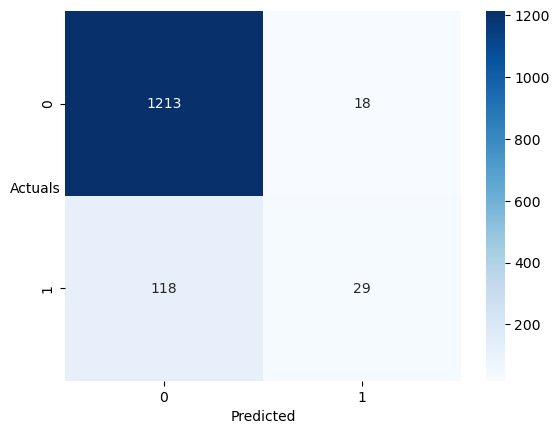

In [89]:
print(metrics.classification_report(Default_train['Default'],y_class_pred,digits=3))
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

<b> It can be observed that the recall value for the defaulters is very low. The optimum threshold frequency can be adjusted to optimize the model performance.

<b> Choosing the optimal threshold for the model

In [90]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['Default'],y_prob_pred_train)

In [91]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
round(optimal_threshold,3)

0.123

<b> Validating on the train set with revised threshold

In [92]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.12:
        a=1
    else:
        a=0
    y_class_pred.append(a)

              precision    recall  f1-score   support

           0      0.965     0.782     0.864      1231
           1      0.295     0.762     0.425       147

    accuracy                          0.780      1378
   macro avg      0.630     0.772     0.645      1378
weighted avg      0.893     0.780     0.817      1378



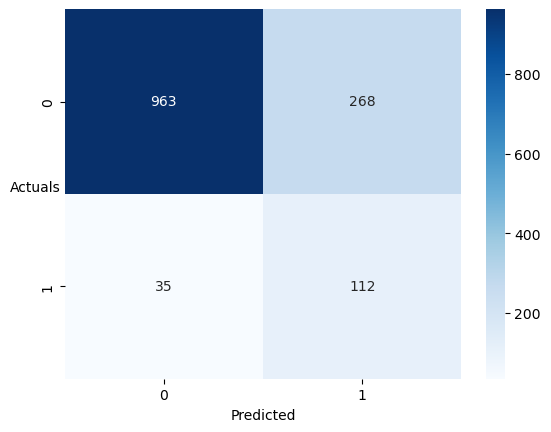

In [93]:
print(metrics.classification_report(Default_train['Default'],y_class_pred,digits=3))
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

<b> It can be observed that the recall value has significantly increased to 76% after redefining the threshold frequency of the model.

<b> Validating on the test set

In [94]:
y_prob_pred_test = model_13.predict(Default_test)

In [95]:
y_class_pred_log=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.12:
        a=1
    else:
        a=0
    y_class_pred_log.append(a)

              precision    recall  f1-score   support

           0      0.960     0.783     0.862       607
           1      0.286     0.726     0.411        73

    accuracy                          0.776       680
   macro avg      0.623     0.754     0.636       680
weighted avg      0.887     0.776     0.814       680



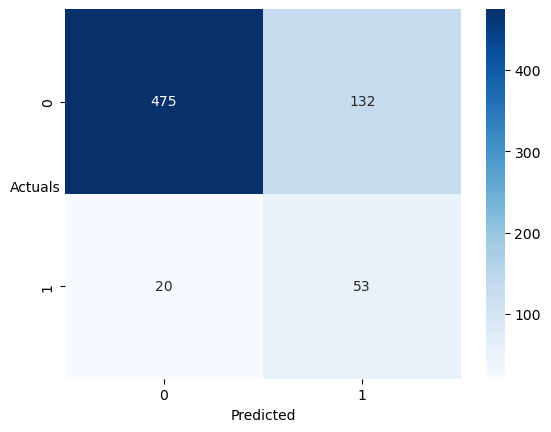

In [96]:
print(metrics.classification_report(Default_test['Default'],y_class_pred_log,digits=3))
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred_log)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

<b> The model is able to correctly predict 72% of the default companies with a confidence of 78%.

# Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9, 12],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45, 55],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 50}

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1231
           1       0.90      0.49      0.63       147

    accuracy                           0.94      1378
   macro avg       0.92      0.74      0.80      1378
weighted avg       0.94      0.94      0.93      1378



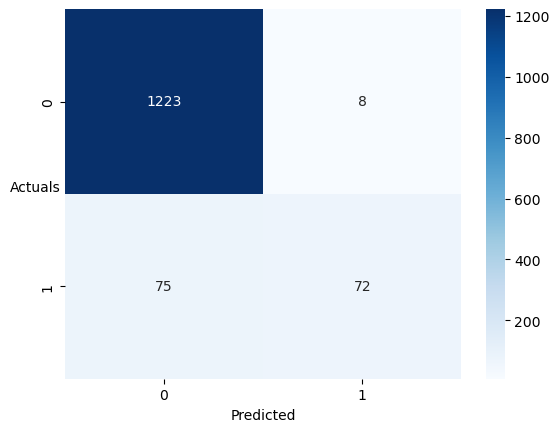

In [98]:
best_grid = grid_search.best_estimator_

pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

print(metrics.classification_report(y_train, pred_train_rf))
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       607
           1       0.75      0.41      0.53        73

    accuracy                           0.92       680
   macro avg       0.84      0.70      0.74       680
weighted avg       0.91      0.92      0.91       680



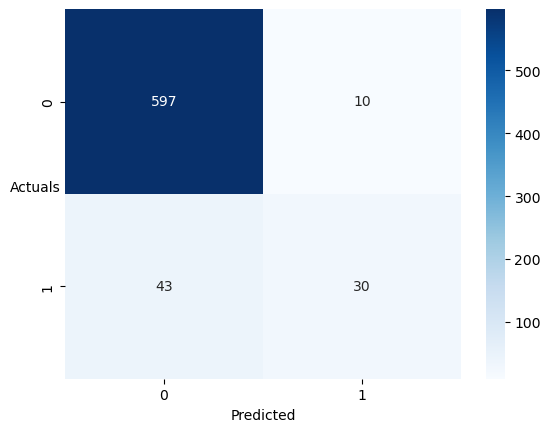

In [99]:
print(metrics.classification_report(y_test, pred_test_rf))
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

<b> Clearly the random forest model is an overfit model as it under performs on the test dataset.

# Linear Discriminant Analysis

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1231
           1       0.62      0.55      0.58       147

    accuracy                           0.92      1378
   macro avg       0.78      0.76      0.77      1378
weighted avg       0.91      0.92      0.91      1378



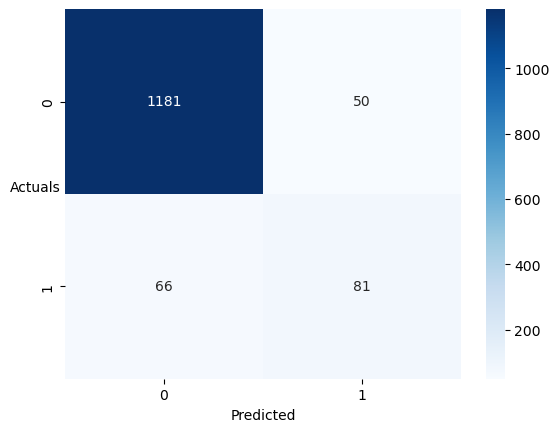

In [100]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

LDA = LinearDiscriminantAnalysis()

lda_model = LDA.fit(X_train, y_train)

pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

print(metrics.classification_report(y_train, pred_train_lda))
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_lda)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       607
           1       0.59      0.56      0.57        73

    accuracy                           0.91       680
   macro avg       0.77      0.76      0.76       680
weighted avg       0.91      0.91      0.91       680



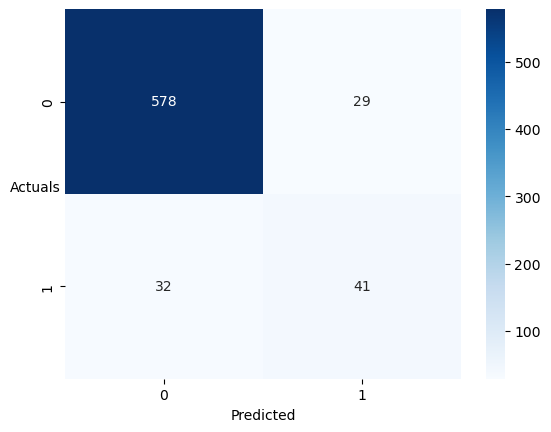

In [101]:
print(metrics.classification_report(y_test, pred_test_lda))
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_lda)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

<b> The LDA model performs well in comparison to the Random Forest model however it still underperforms in comparison to the Logistic Regression model.

# Models Comparison

## Classification Reports

In [102]:
print("Classification Reports for different models:\n\n")
Log_classification_report = metrics.classification_report(Default_test['Default'],y_class_pred_log,digits=3)
LDA_classification_report = metrics.classification_report(y_test, pred_test_lda,digits=3)
RF_classification_report = metrics.classification_report(y_test, pred_test_rf)

print("Logistic Regression Model:\n {}\n\nRandom Forest Model:\n {}\n\nLDA Model:\n {}\n\n".format(Log_classification_report,RF_classification_report,LDA_classification_report))

Classification Reports for different models:


Logistic Regression Model:
               precision    recall  f1-score   support

           0      0.960     0.783     0.862       607
           1      0.286     0.726     0.411        73

    accuracy                          0.776       680
   macro avg      0.623     0.754     0.636       680
weighted avg      0.887     0.776     0.814       680


Random Forest Model:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       607
           1       0.75      0.41      0.53        73

    accuracy                           0.92       680
   macro avg       0.84      0.70      0.74       680
weighted avg       0.91      0.92      0.91       680


LDA Model:
               precision    recall  f1-score   support

           0      0.948     0.952     0.950       607
           1      0.586     0.562     0.573        73

    accuracy                          0.910       680
   macro avg     

## AUC/ROC Curves

### Logistic Regression Model

In [103]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_pred_test = model_13.predict(Default_test)
fpr, tpr, thresholds = roc_curve(Default_test['Default'], y_prob_pred_test)
roc_auc = auc(fpr, tpr)

#### Plotting the Curve

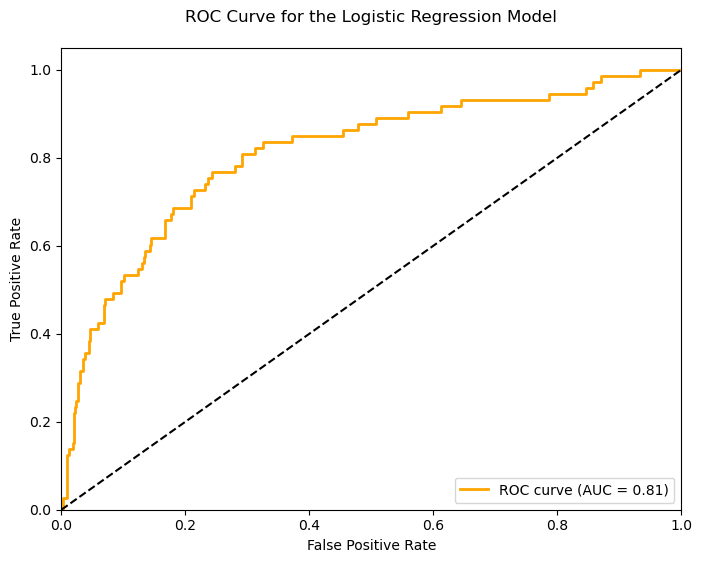

In [104]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the Logistic Regression Model\n')
plt.legend(loc="lower right")
plt.show()

### Random Forest Model

In [105]:
y_prob_pred_test = best_grid.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_pred_test)
roc_auc_rf = auc(fpr_rf, tpr_rf)




#### Plotting ROC curve

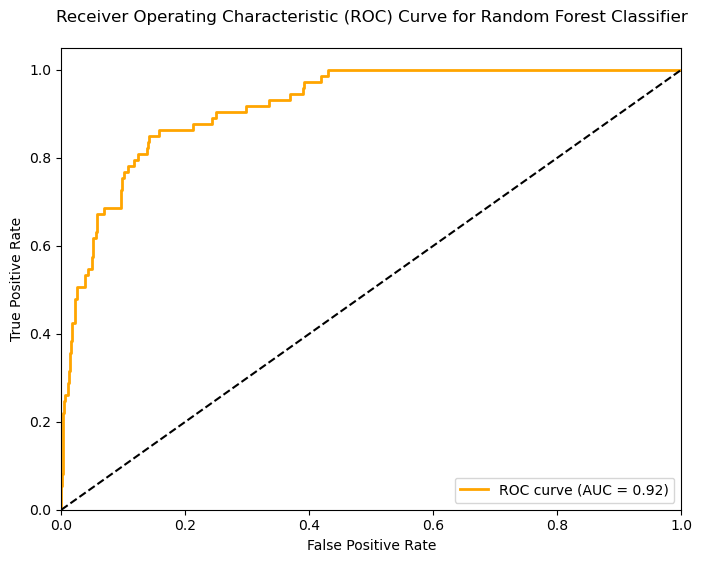

In [106]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier\n')
plt.legend(loc="lower right")
plt.show()

### LDA Model

In [107]:
y_prob_pred_test = lda_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_pred_test)
roc_auc_rf = auc(fpr_rf, tpr_rf)



#### Plotting ROC curve

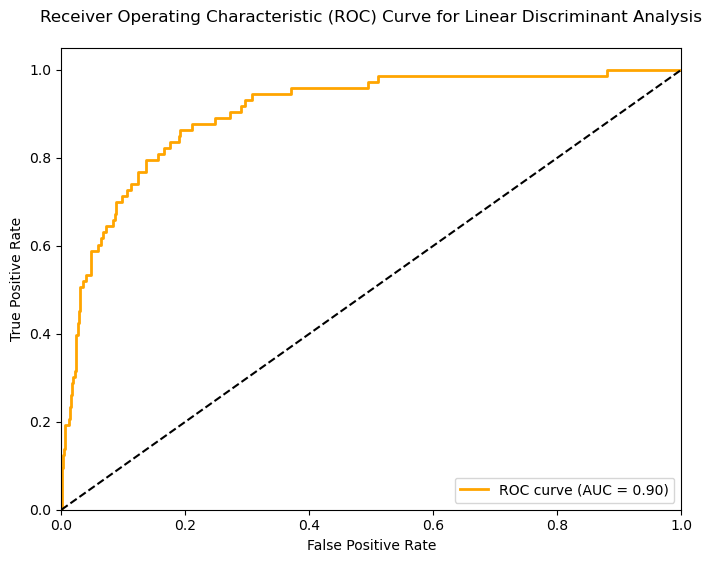

In [108]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Linear Discriminant Analysis\n')
plt.legend(loc="lower right")
plt.show()

# END